# C133 Team 5 Random Forest (Refer to section 4 Directly)
Done by Vignesh
(Section 1, 2, 3 is outdated. please refer to the 'Data Preprocessing, Cleaning and Exploratory Analysis.ipynb' for latest version)

### Section 1: Introduction and Observations (Outdated)
### Section 2: Cleaning (Outdated)
### Section 3: Exploratory Analysis (Outdated)
### Section 4: Model 3: Random Forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

# Section 1: Introduction and Observations

# import and print the data

## objective of this project
3 main objectives / problems we are going to solve -> we are going to predict the the rating star of the phone
1) Help brands to improve their future qualities of phone by predicting the stars based on the phones specifications  <br>
2) Identify the most prominent variables and features of a phone resuting in a high star rating  <br>
3) Help users find the best rated phone that suit their preferences  <br>

In [2]:
original = pd.read_csv('mobiles.csv')
original.head()

Unnamed: 0                                        names  \
0           0   SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)   
1           1   SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)   
2           2                                 itel it2163S   
3           3  SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)   
4           4  SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)   

                                        images_links  stars  \
0  https://rukminim1.flixcart.com/image/312/312/x...    4.4   
1  https://rukminim1.flixcart.com/image/312/312/x...    4.4   
2  https://rukminim1.flixcart.com/image/312/312/l...    4.1   
3  https://rukminim1.flixcart.com/image/312/312/x...    4.4   
4  https://rukminim1.flixcart.com/image/312/312/x...    4.4   

                     rating&reviews            price_details  \
0  1,20,759 Ratings & 7,003 Reviews   ₹9,699\n₹14,99935% off   
1  1,20,759 Ratings & 7,003 Reviews   ₹9,699\n₹14,99935% off   
2          702 Ratings & 67 Reviews         ₹989\n₹9991% off   
3  1,20,759 Ratings & 7,003 Reviews  ₹10,699\n₹16,99937% off   
4  1,20,759 Ratings & 7,003 Reviews  ₹10,699\n₹16,99937% off   

                                         memory  \
0   4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
1   4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
2   4 MB RAM | 4 MB ROM | Expandable Upto 32 GB   
3  4 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
4  4 GB RAM | 128 GB ROM | Expandable Upto 1 TB   

                           camara_info  \
0  50MP + 5MP + 2MP | 8MP Front Camera   
1  50MP + 5MP + 2MP | 8MP Front Camera   
2         1200 mAh Lithium Ion Battery   
3  50MP + 5MP + 2MP | 8MP Front Camera   
4  50MP + 5MP + 2MP | 8MP Front Camera   

                                   display  \
0     16.76 cm (6.6 inch) Full HD+ Display   
1     16.76 cm (6.6 inch) Full HD+ Display   
2  4.57 cm (1.8 inch) Quarter QVGA Display   
3     16.76 cm (6.6 inch) Full HD+ Display   
4     16.76 cm (6.6 inch) Full HD+ Display   

                                             battery  \
0                       6000 mAh Lithium Ion Battery   
1                       6000 mAh Lithium Ion Battery   
2  7 Days Battery Backup with 1200mAh with Super ...   
3                       6000 mAh Lithium Ion Battery   
4                       6000 mAh Lithium Ion Battery   

                         processor  \
0             Exynos 850 Processor   
1             Exynos 850 Processor   
2  9 Indian Input Language Support   
3             Exynos 850 Processor   
4             Exynos 850 Processor   

                                            warranty  
0  1 Year Warranty Provided By the Manufacturer f...  
1  1 Year Warranty Provided By the Manufacturer f...  
2                              BT Caller, Kingtalker  
3  1 Year Warranty Provided By the Manufacturer f...  
4  1 Year Warranty Provided By the Manufacturer f...

In [3]:
original.dtypes



Unnamed: 0          int64
names              object
images_links       object
stars             float64
rating&reviews     object
price_details      object
memory             object
camara_info        object
display            object
battery            object
processor          object
warranty           object
dtype: object

In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1148 non-null   int64  
 1   names           943 non-null    object 
 2   images_links    1143 non-null   object 
 3   stars           922 non-null    float64
 4   rating&reviews  922 non-null    object 
 5   price_details   1143 non-null   object 
 6   memory          943 non-null    object 
 7   camara_info     943 non-null    object 
 8   display         943 non-null    object 
 9   battery         943 non-null    object 
 10  processor       900 non-null    object 
 11  warranty        616 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 107.8+ KB


### Observation 1, insignificant columns
1) from the discribed table we are able to see that images_links does not have any data analysis value. They are simply links for the images of the phone. therefore can be dropped.  <br>
2) warranty of the phone varies as the user are able to extend their  warranty, therefore not important in this analysis and will be dropped  <br>
3) the ratings and review columns are the same for the same brand and not the rating for each different type of phones, therefore not applicable to predict which phone is better. and will be dropped  <br>

### Observation 2, all the columns except the stars are in string/object format
1) cleaning and formatting is needed so that the data can be analysed

a) names - a new column will be created that substring the brand (catergorical)  <br>
b) price_details - the original price of the phone will be extracted from the string and convert to sgd (numerical)  <br>
c) memory - contais 3 main component, the ram, rom, expandable storage(sd card) (numeric, numeric, boolean)  <br>
d) camera info - the highest rear camera and front camera will be taken (numerical)  <br>
e) display - will be split into 2 variable, the size and type (numerical)  <br>
f) battery - the number of the battery size is extracted (numerical)  <br>
g) processor - due to the amount of vast processor, we will only be   extracting the brand (cateogorical)  <br>

Final columns
a) names  <br>
b) price  <br>
c) ram  <br>
d) rom  <br>
e) expandable Y/N  <br>
f) front_camera  <br>
g) rear_camera  <br>
h) display_size  <br>
i) display_type  <br>
j) battery  <br>
k) processor DONE  <br>
l) color DONE  <br>
m) brand DONE  <br>

### Obeservation 3, the rows with apple phone seems to have an error in its storage section

1) extra details are inserted into the rows of apple from other sources

### Observation 4 there are alot of null values
total rows is 1148, rows with names and model, 943
1148-943 = 205 null phones
all will be removed

After Observation 2 is done then we will do the explratory analysis
- 1. show all the different type for catogorical. and the number of data in that category show 
- 2. for numerical show the describe (mean mode) box plot, scatter plot 
- 3. for both data types show the count of outliers
- 3. does any of the variables have any relationship with the stars?

# Section 2: Cleaning

# drop image_link and ratings_review and warranty

In [5]:
dropped = original.drop(columns=['images_links','rating&reviews','warranty'])
dropped = original.drop(columns=['images_links','rating&reviews'])

dropped.head()

Unnamed: 0                                        names  stars  \
0           0   SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)    4.4   
1           1   SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)    4.4   
2           2                                 itel it2163S    4.1   
3           3  SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)    4.4   
4           4  SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)    4.4   

             price_details                                        memory  \
0   ₹9,699\n₹14,99935% off   4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
1   ₹9,699\n₹14,99935% off   4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
2         ₹989\n₹9991% off   4 MB RAM | 4 MB ROM | Expandable Upto 32 GB   
3  ₹10,699\n₹16,99937% off  4 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
4  ₹10,699\n₹16,99937% off  4 GB RAM | 128 GB ROM | Expandable Upto 1 TB   

                           camara_info  \
0  50MP + 5MP + 2MP | 8MP Front Camera   
1  50MP + 5MP + 2MP | 8MP Front Camera   
2         1200 mAh Lithium Ion Battery   
3  50MP + 5MP + 2MP | 8MP Front Camera   
4  50MP + 5MP + 2MP | 8MP Front Camera   

                                   display  \
0     16.76 cm (6.6 inch) Full HD+ Display   
1     16.76 cm (6.6 inch) Full HD+ Display   
2  4.57 cm (1.8 inch) Quarter QVGA Display   
3     16.76 cm (6.6 inch) Full HD+ Display   
4     16.76 cm (6.6 inch) Full HD+ Display   

                                             battery  \
0                       6000 mAh Lithium Ion Battery   
1                       6000 mAh Lithium Ion Battery   
2  7 Days Battery Backup with 1200mAh with Super ...   
3                       6000 mAh Lithium Ion Battery   
4                       6000 mAh Lithium Ion Battery   

                         processor  \
0             Exynos 850 Processor   
1             Exynos 850 Processor   
2  9 Indian Input Language Support   
3             Exynos 850 Processor   
4             Exynos 850 Processor   

                                            warranty  
0  1 Year Warranty Provided By the Manufacturer f...  
1  1 Year Warranty Provided By the Manufacturer f...  
2                              BT Caller, Kingtalker  
3  1 Year Warranty Provided By the Manufacturer f...  
4  1 Year Warranty Provided By the Manufacturer f...

# Remove null rows

In [6]:
dropped = dropped.dropna(subset=['names'])
dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1142
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     943 non-null    int64  
 1   names          943 non-null    object 
 2   stars          922 non-null    float64
 3   price_details  943 non-null    object 
 4   memory         943 non-null    object 
 5   camara_info    943 non-null    object 
 6   display        943 non-null    object 
 7   battery        943 non-null    object 
 8   processor      900 non-null    object 
 9   warranty       616 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 81.0+ KB


In [7]:
#create a column with the brand only using the names column
dropped['Brand']= dropped['names'].str.split(' ').str[0]


In [8]:
dropped.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     943 non-null    int64  
 1   names          943 non-null    object 
 2   stars          922 non-null    float64
 3   price_details  943 non-null    object 
 4   memory         943 non-null    object 
 5   camara_info    943 non-null    object 
 6   display        943 non-null    object 
 7   battery        943 non-null    object 
 8   processor      900 non-null    object 
 9   warranty       616 non-null    object 
 10  Brand          943 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 88.4+ KB


In [9]:
print(dropped['Brand'])

0        SAMSUNG
1        SAMSUNG
2           itel
3        SAMSUNG
4        SAMSUNG
          ...   
1138        vivo
1139        LAVA
1140       Tecno
1141    Kechaoda
1142       APPLE
Name: Brand, Length: 943, dtype: object


In [10]:
#it is observed that the apple rows have their processor saved in battery
#the following 2 row are used to transfer the row from battery to processor
#we then replace the battery with NA
dropped.loc[dropped['Brand'].str.upper()=='APPLE', 'processor'] = dropped['battery']
dropped.loc[dropped['Brand'].str.upper()=='APPLE', 'battery'] = 'NA'

#a few of the rows for processor does not have value, we replace with NA
dropped['processor'] = dropped['processor'].fillna('NA')

#afew rows have their warranty save under processor, we will replace it with NA
dropped.loc[dropped['processor'].str.upper().str.contains('YEAR'), 'processor'] = 'NA'

dropped.loc[dropped['processor'].str.upper().str.contains('LANGUAGE'), 'processor'] = 'NA'
dropped.loc[dropped['processor'].str.upper().str.contains('MONTH'), 'processor'] = 'NA'
dropped.loc[dropped['processor'].str.upper().str.contains('NA PROCESSOR'), 'processor'] = 'NA'

print(dropped['Brand']=='APPLE')

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142     True
Name: Brand, Length: 943, dtype: bool


In [11]:
dropped.head(50)

Unnamed: 0                                         names  stars  \
0            0    SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)    4.4   
1            1    SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)    4.4   
2            2                                  itel it2163S    4.1   
3            3   SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)    4.4   
4            4   SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)    4.4   
5            5   Infinix HOT 20 Play (Fantasy Purple, 64 GB)    4.4   
6            6                              GREENBERRI VIRAT    3.7   
7            7     Infinix HOT 20 Play (Racing Black, 64 GB)    4.4   
8            8        Infinix HOT 20 Play (Luna Blue, 64 GB)    4.4   
9            9     Infinix HOT 20 Play (Aurora Green, 64 GB)    4.4   
10          10          REDMI 9i Sport (Carbon Black, 64 GB)    4.3   
11          11                 POCO C31 (Shadow Gray, 64 GB)    4.3   
12          12       MOTOROLA G62 5G (Midnight Gray, 128 GB)    4.1   
13          13             REDMI 10 (Caribbean Green, 64 GB)    4.3   
14          14              REDMI 10 (Midnight Black, 64 GB)    4.3   
15          15               POCO M4 Pro (Cool Blue, 128 GB)    4.3   
16          16            APPLE iPhone 14 (Midnight, 128 GB)    4.7   
17          17                  POCO C31 (Royal Blue, 64 GB)    4.3   
18          18                POCO M4 Pro (Cool Blue, 64 GB)    4.3   
19          19          MOTOROLA g52 (Charcoal Grey, 128 GB)    4.2   
20          20          Infinix Smart 6 HD (Aqua Sky, 32 GB)    4.4   
21          21       Infinix Smart 6 HD (Force Black, 32 GB)    4.4   
22          22            MOTOROLA e13 (Cosmic Black, 64 GB)    NaN   
28          28       Infinix Smart 6 HD (Origin Blue, 32 GB)    4.4   
29          29               MOTOROLA g31 (Baby Blue, 64 GB)    4.2   
30          30                                  itel it2163S    4.1   
31          31        SAMSUNG Galaxy F04 (Opal Green, 64 GB)    4.5   
32          32     SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)    4.3   
33          33               APPLE iPhone 11 (White, 128 GB)    4.6   
34          34                                   itel IT5626    4.0   
35          35             realme C35 (Glowing Black, 64 GB)    4.4   
36          36                                  Nokia 105 SS    4.2   
37          37       SAMSUNG Galaxy F04 (Jade Purple, 64 GB)    4.5   
38          38                              GREENBERRI VIRAT    3.7   
39          39            MOTOROLA G32 (Mineral Gray, 64 GB)    4.2   
40          40                 POCO C31 (Shadow Gray, 32 GB)    4.3   
41          41          MOTOROLA g31 (Meteorite Grey, 64 GB)    4.2   
42          42           APPLE iPhone 14 (Starlight, 128 GB)    4.7   
43          43               APPLE iPhone 11 (Black, 128 GB)    4.6   
44          44        MOTOROLA G62 5G (Frosted Blue, 128 GB)    4.1   
45          45  SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)    4.3   
46          46             realme C35 (Glowing Green, 64 GB)    4.4   
47          47            MOTOROLA e13 (Creamy White, 64 GB)    4.3   
48          48             POCO M4 Pro 5G (Cool Blue, 64 GB)    4.2   
49          49       MOTOROLA G62 5G (Midnight Gray, 128 GB)    4.2   
50          50        Infinix Hot 20 5G (Space Blue, 128 GB)    NaN   
56          56              realme C30s (Stripe Blue, 32 GB)    4.5   
57          57          MOTOROLA g52 (Metallic White, 64 GB)    4.2   
58          58                                  itel it2163S    4.1   
59          59                 realme C33 (Night Sea, 32 GB)    4.4   

              price_details                                         memory  \
0    ₹9,699\n₹14,99935% off    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
1    ₹9,699\n₹14,99935% off    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
2          ₹989\n₹9991% off    4 MB RAM | 4 MB ROM | Expandable Upto 32 GB   
3   ₹10,699\n₹16,99937% off   4 GB RAM | 128 GB ROM | Expandable Upto 

In [12]:
dropped['Brand'].describe()

count      943
unique      40
top       itel
freq       120
Name: Brand, dtype: object

In [13]:
dropped['processor'].describe()

count     943
unique    121
top        NA
freq      339
Name: processor, dtype: object

In [14]:
#create a column called color from the name.
dropped['Color']= dropped['names'].str.split(',').str[0].str.split(' ').str[-1]
dropped['Color']= dropped['Color'].str.split('(').str[-1].str.upper()
dropped.loc[dropped['Color'].str.upper().str.contains('IT'), 'Color'] = 'NA'
dropped.loc[dropped['Color'].str.upper().str.contains('VIR'), 'Color'] = 'NA'
dropped.loc[dropped['Color'].str.upper().str.contains('SS'), 'Color'] = 'NA'
dropped.loc[dropped['Color'].str.upper().str.contains('GRAY'), 'Color'] = 'GREY'

dropped['Color'].head(100)

0        BLUE
1      COPPER
2          NA
3       GREEN
4        BLUE
        ...  
115      BLUE
116     BLACK
117      BLUE
118        NA
119      GOLD
Name: Color, Length: 100, dtype: object

In [15]:
dropped['Color'].describe()

count     943
unique    151
top        NA
freq      170
Name: Color, dtype: object

## plot color to see if there is any relation to the rating (most likely not used as too many null)

In [16]:
#apple rows
print(dropped[dropped['Brand']=='APPLE'])

      Unnamed: 0                                           names  stars  \
16            16              APPLE iPhone 14 (Midnight, 128 GB)    4.7   
33            33                 APPLE iPhone 11 (White, 128 GB)    4.6   
42            42             APPLE iPhone 14 (Starlight, 128 GB)    4.7   
43            43                 APPLE iPhone 11 (Black, 128 GB)    4.6   
71            71                APPLE iPhone 14 (Purple, 128 GB)    4.7   
74            74                  APPLE iPhone 14 (Blue, 128 GB)    4.7   
78            78                  APPLE iPhone 11 (Black, 64 GB)    4.6   
184          184                 APPLE iPhone 12 (Black, 128 GB)    4.6   
235          235                  APPLE iPhone 11 (White, 64 GB)    4.6   
244          244                  APPLE iPhone 13 (Blue, 128 GB)    4.7   
255          255        APPLE iPhone 14 Plus (Starlight, 128 GB)    4.7   
263          263          APPLE iPhone 14 ((PRODUCT)RED, 128 GB)    4.7   
293          293         

In [17]:
#Memory section

dropped['Ram']= dropped['memory'].str.split('|').str[0]
dropped['Rom']= dropped['memory'].str.split('|').str[1]

#expandable or not column 
dropped.loc[dropped['memory'].str.upper().str.contains('EXPAND'), 'expandable'] = 1;
dropped['expandable'] = dropped['expandable'].fillna('0')


# replace the missing values with 0
dropped['Ram'] = dropped['Ram'].fillna('0 GB RAM')
dropped['Rom'] = dropped['Rom'].fillna('0 GB ROM')

#if the rom column contain ram and if the ram clomun comtain rom
dropped.loc[dropped['Ram'].str.upper().str.contains('ROM'), 'Rom'] = dropped['Ram'];
dropped.loc[dropped['Ram'].str.upper().str.contains('ROM'), 'Ram'] = '0 GB RAM';
dropped.loc[dropped['Rom'].str.upper().str.contains('Ram'), 'Ram'] = dropped['Rom'];
dropped.loc[dropped['Rom'].str.upper().str.contains('Ram'), 'Rom'] = '0 GB ROM';

#if the column contain NA RAM or NA ROM replace with 0 GB OR if they contain other data
dropped.loc[~dropped['Ram'].str.upper().str.contains('RAM') | dropped['Ram'].str.upper().str.contains('NA') , 'Ram'] = '0 GB RAM';
dropped.loc[~dropped['Rom'].str.upper().str.contains('ROM') | dropped['Rom'].str.upper().str.contains('NA') , 'Rom'] = '0 GB ROM';

# strip leading and trailing whitespace from the new columns
dropped['Ram'] = dropped['Ram'].str.strip()
dropped['Rom'] = dropped['Rom'].str.strip()


#convert ram and rom to numbers
dropped.loc[dropped['Ram'].str.upper().str.contains('MB'), 'Ram'] = str(dropped['Ram'].str.split(' ').str[0].astype('float') / 1000) + 'GB RAM'
dropped.loc[dropped['Rom'].str.upper().str.contains('MB'), 'Rom'] = str(dropped['Rom'].str.split(' ').str[0].astype('float') / 1000) + 'GB ROM'

#convert to float
dropped.loc[dropped['Ram'].str.upper().str.contains('RAM'), 'Ram'] = dropped['Ram'].str.split(' ').str[0].astype('float')
dropped.loc[dropped['Rom'].str.upper().str.contains('ROM'), 'Rom'] = dropped['Rom'].str.split(' ').str[0].astype('float')

dropped.to_csv('dropped.csv', index=False)

In [18]:
#apple 

dropped.loc[dropped['names'].str.upper().str.contains('IPHONE 14'), 'Ram'] = 6.0
dropped.loc[dropped['names'].str.upper().str.contains('IPHONE 13'), 'Ram'] = 4.0
dropped.loc[dropped['names'].str.upper().str.contains('IPHONE 12'), 'Ram'] = 4.0
dropped.loc[dropped['names'].str.upper().str.contains('IPHONE 11'), 'Ram'] = 4.0



## things observed while formatting ram and rom

1) diff row have very different way of formatting their rom and ram  <br>
4 GB RAM | 64 GB ROM | Expandable Upto 1 TB  <br>
8 GB RAM | 128 GB ROM  <br>
128 GB ROM  <br>
NA ROM  <br>
6.6 cm (2.6 inch) QVGA Display  <br>
8 MB RAM | 8 MB ROM | Expandable Upto 32 GB  <br>
8 MB ROM | Expandable Upto 32 GB  <br>
### ! there are too many types of formatting, thus simply splitting wont work.
1) splitting will cause some ram column to have the rom value - thus need to swap  <br>
2) rows without data/NAN will be replace by 0 GB  <br>
3) after split can convert to int/float as there are some rows with screen data or NA RAM/ROM  <br>
4) replace all the rows with 'NA', or other strings that dont have 'RAM' or 'ROM' with 0  <br>
5) there is a mix of MB and GB, thus we need to convert those in mb by /1000  <br>
6) APPLE brand do not have ram data thus need to find external sources and input (40 rows)  <br>

NOTE: export to csv to check error

In [19]:
dropped.head(50)

Unnamed: 0                                         names  stars  \
0            0    SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)    4.4   
1            1    SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)    4.4   
2            2                                  itel it2163S    4.1   
3            3   SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)    4.4   
4            4   SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)    4.4   
5            5   Infinix HOT 20 Play (Fantasy Purple, 64 GB)    4.4   
6            6                              GREENBERRI VIRAT    3.7   
7            7     Infinix HOT 20 Play (Racing Black, 64 GB)    4.4   
8            8        Infinix HOT 20 Play (Luna Blue, 64 GB)    4.4   
9            9     Infinix HOT 20 Play (Aurora Green, 64 GB)    4.4   
10          10          REDMI 9i Sport (Carbon Black, 64 GB)    4.3   
11          11                 POCO C31 (Shadow Gray, 64 GB)    4.3   
12          12       MOTOROLA G62 5G (Midnight Gray, 128 GB)    4.1   
13          13             REDMI 10 (Caribbean Green, 64 GB)    4.3   
14          14              REDMI 10 (Midnight Black, 64 GB)    4.3   
15          15               POCO M4 Pro (Cool Blue, 128 GB)    4.3   
16          16            APPLE iPhone 14 (Midnight, 128 GB)    4.7   
17          17                  POCO C31 (Royal Blue, 64 GB)    4.3   
18          18                POCO M4 Pro (Cool Blue, 64 GB)    4.3   
19          19          MOTOROLA g52 (Charcoal Grey, 128 GB)    4.2   
20          20          Infinix Smart 6 HD (Aqua Sky, 32 GB)    4.4   
21          21       Infinix Smart 6 HD (Force Black, 32 GB)    4.4   
22          22            MOTOROLA e13 (Cosmic Black, 64 GB)    NaN   
28          28       Infinix Smart 6 HD (Origin Blue, 32 GB)    4.4   
29          29               MOTOROLA g31 (Baby Blue, 64 GB)    4.2   
30          30                                  itel it2163S    4.1   
31          31        SAMSUNG Galaxy F04 (Opal Green, 64 GB)    4.5   
32          32     SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)    4.3   
33          33               APPLE iPhone 11 (White, 128 GB)    4.6   
34          34                                   itel IT5626    4.0   
35          35             realme C35 (Glowing Black, 64 GB)    4.4   
36          36                                  Nokia 105 SS    4.2   
37          37       SAMSUNG Galaxy F04 (Jade Purple, 64 GB)    4.5   
38          38                              GREENBERRI VIRAT    3.7   
39          39            MOTOROLA G32 (Mineral Gray, 64 GB)    4.2   
40          40                 POCO C31 (Shadow Gray, 32 GB)    4.3   
41          41          MOTOROLA g31 (Meteorite Grey, 64 GB)    4.2   
42          42           APPLE iPhone 14 (Starlight, 128 GB)    4.7   
43          43               APPLE iPhone 11 (Black, 128 GB)    4.6   
44          44        MOTOROLA G62 5G (Frosted Blue, 128 GB)    4.1   
45          45  SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)    4.3   
46          46             realme C35 (Glowing Green, 64 GB)    4.4   
47          47            MOTOROLA e13 (Creamy White, 64 GB)    4.3   
48          48             POCO M4 Pro 5G (Cool Blue, 64 GB)    4.2   
49          49       MOTOROLA G62 5G (Midnight Gray, 128 GB)    4.2   
50          50        Infinix Hot 20 5G (Space Blue, 128 GB)    NaN   
56          56              realme C30s (Stripe Blue, 32 GB)    4.5   
57          57          MOTOROLA g52 (Metallic White, 64 GB)    4.2   
58          58                                  itel it2163S    4.1   
59          59                 realme C33 (Night Sea, 32 GB)    4.4   

              price_details                                         memory  \
0    ₹9,699\n₹14,99935% off    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
1    ₹9,699\n₹14,99935% off    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
2          ₹989\n₹9991% off    4 MB RAM | 4 MB ROM | Expandable Upto 32 GB   
3   ₹10,699\n₹16,99937% off   4 GB RAM | 128 GB ROM | Expandable Upto 

In [20]:
dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     943 non-null    int64  
 1   names          943 non-null    object 
 2   stars          922 non-null    float64
 3   price_details  943 non-null    object 
 4   memory         943 non-null    object 
 5   camara_info    943 non-null    object 
 6   display        943 non-null    object 
 7   battery        943 non-null    object 
 8   processor      943 non-null    object 
 9   warranty       616 non-null    object 
 10  Brand          943 non-null    object 
 11  Color          943 non-null    object 
 12  Ram            943 non-null    float64
 13  Rom            943 non-null    float64
 14  expandable     943 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 150.2+ KB


# CHEE CHENG PART

In [21]:
# Split camera_info  column into two new columns , Rear Camera and Front Camera
dropped[['Rear Camera', 'Front Camera']] = dropped.camara_info.str.split("|", expand = True)
dropped[['Rear Camera', 'Front Camera']].describe()


Rear Camera        Front Camera
count                 943                 527
unique                107                  19
top     0.3MP Rear Camera   16MP Front Camera
freq                  136                 174

In [22]:
print(dropped["Rear Camera"].unique())

['50MP + 5MP + 2MP ' '1200 mAh Lithium Ion Battery' '13Mp + AI Lens '
 '2MP Rear Camera' '13MP Rear Camera ' '13MP + 2MP + 2MP '
 '50MP + 8MP + 2MP ' '50MP + 2MP ' '64MP + 8MP + 2MP ' '12MP + 12MP '
 '8MP Rear Camera ' '13MP + 2MP ' '0.3MP Rear Camera'
 '50MP + 2MP + 0.3MP ' '0MP Front Camera' '50MP + 8MP ' '50MP + AI Lens '
 '50MP + 0.3MP ' '50MP + 2MP + 2MP ' '48MP + 2MP + 2MP '
 '108MP + 8MP + 2MP ' '50 MP + 2 MP Depth Lens + AI Lens '
 '64MP + 8MP + 2MP + 2MP ' '8MP Dual Camera ' '50 MP + 2 MP + QVGA '
 '13MP Rear Camera' '50MP + 8MP + 2MP + 2MP ' '13MP + 2MP + 0.3MP '
 '108MP + 2MP + 2MP ' '5MP Rear Camera' '108MP + 2MP '
 '108MP + 8MP + 16MP ' '50MP + 0.3MP + 0.3MP ' '800 mAh Battery'
 '50MP Rear Camera' '1.3MP Rear Camera' '1000 mAh Battery'
 '1MP Rear Camera' '50MP (OIS) + 8MP + 2MP ' '48MP + 2MP '
 '108MP + 2MP (Depth) + 2MP (Macro) ' '8 MP + Depth Lens '
 '12.2MP + 12MP ' '50MP + 50MP + 2MP ' '50MP + 50MP ' '1750 mAh Battery'
 '64MP Rear Camera' '50MP + 2MP Depth Sensor + 2MP

After splitting and checking the unique values, it is noted that some rows have battery info in it. Also it is noted that there is a data with front camera in it. => replace both rear and front camera with 0 mp , since upon inspection of excel sheet that there is no data for the camera. ( 0 MP for both front and rear camera)

In [23]:
#Find the index which has the wrong value
indices = dropped[dropped['Rear Camera'].str.contains('mAh')].index

# print the indices
print(indices)

Int64Index([   2,   30,   58,   86,  114,  142,  170,  175,  187,  198,  213,
             226,  239,  254,  282,  291,  310,  321,  329,  338,  343,  366,
             367,  394,  406,  413,  422,  435,  440,  450,  478,  479,  484,
             488,  506,  534,  536,  551,  562,  563,  567,  571,  582,  590,
             592,  618,  620,  636,  646,  656,  665,  674,  684,  689,  702,
             712,  713,  729,  730,  743,  758,  760,  786,  789,  797,  814,
             842,  870,  872,  875,  876,  886,  897,  898,  910,  926,  954,
             982, 1010, 1037, 1038, 1041, 1044, 1066, 1094, 1096, 1100, 1122,
            1131, 1135],
           dtype='int64')


After checking with excel sheet seems like those that contain the wrong row also do not have camera info

In [24]:
# Extract datas with the first occurance of MP Rear Camera => this drops the battery info and front camera info and also the additional cameras.
dropped["Rear Camera"] = dropped["Rear Camera"].str.extract(r'(\d+MP)')

In [25]:
#after extracting, 0.08MP , 0.03MP 108 MP, became 08MP,03MP,10.08MP respectively, this replaces it to its true value.
dropped["Rear Camera"] = dropped["Rear Camera"].str.replace('08MP', '0.08MP').str.replace('03MP', '0.03MP').str.replace('10.08MP', '108MP')

C:\Users\haoku\AppData\Local\Temp\ipykernel_7784\1562915345.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dropped["Rear Camera"] = dropped["Rear Camera"].str.replace('08MP', '0.08MP').str.replace('03MP', '0.03MP').str.replace('10.08MP', '108MP')


In [26]:
# replace the missing values with 0MP
dropped['Rear Camera'] = dropped['Rear Camera'].fillna('0MP')

In [27]:
print(dropped["Rear Camera"].unique())

['50MP' '0MP' '2MP' '13MP' '64MP' '12MP' '8MP' '3MP' '48MP' '108MP' '5MP'
 '1MP' '0.08MP' '200MP' '16MP' '0.03MP' '32MP']


In [28]:
dropped["Rear Camera"].describe()

count      943
unique      17
top       50MP
freq       223
Name: Rear Camera, dtype: object

In [29]:
#convert datatype from object to float
dropped["Rear Camera"] = dropped["Rear Camera"].str.replace('MP', '')
dropped["Rear Camera"] = dropped["Rear Camera"].astype('float64')

In [30]:
dropped["Rear Camera"].describe()

count    943.000000
mean      27.291220
std       31.572795
min        0.000000
25%        3.000000
50%       12.000000
75%       50.000000
max      200.000000
Name: Rear Camera, dtype: float64

In [31]:
print(dropped["Front Camera"].unique())

[' 8MP Front Camera' None ' 5MP Front Camera' ' 16MP Front Camera'
 ' 12MP Front Camera' ' 13MP Front Camera' ' 32MP Front Camera'
 ' 60 MP with OIS' ' 44MP Front Camera' ' 16MP + 2MP Dual Front Camera'
 ' 20MP Front Camera' ' 0MP Front Camera' ' 60MP Front Camera'
 ' 10.8MP Front Camera' ' 32MP + 2MP Dual Front Camera'
 ' 2MP Front Camera' ' 10MP Front Camera' ' 16MP + 16MP Dual Front Camera'
 ' 50MP + 8MP Dual Front Camera' ' 0.3MP Front Camera']


Noted there are multiple cameras as well => Take only the first occurance of the data with MP.

In [32]:
# Extract datas with the first occurance of Front Camera
dropped["Front Camera"] = dropped["Front Camera"].str.extract(r'(\d+MP)')

In [33]:
print(dropped["Front Camera"].unique())

['8MP' nan '5MP' '16MP' '12MP' '13MP' '32MP' '44MP' '20MP' '0MP' '60MP'
 '2MP' '10MP' '50MP' '3MP']


In [34]:
# replace the missing values with 0MP
dropped['Front Camera'] = dropped['Front Camera'].fillna('0MP')

In [35]:
dropped["Front Camera"].describe()

count     943
unique     14
top       0MP
freq      421
Name: Front Camera, dtype: object

In [36]:
#convert datatype from object to float
dropped["Front Camera"] = dropped["Front Camera"].str.replace('MP', '')
dropped["Front Camera"] = dropped["Front Camera"].astype('float64')

In [37]:
dropped["Front Camera"].describe()

count    943.000000
mean       6.925769
std        8.645459
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       60.000000
Name: Front Camera, dtype: float64

In [38]:
# Split Display column into two new columns Length and Display
dropped[['Length', 'Display']] = dropped.display.str.split(")", expand = True)
dropped[['Length', 'Display']].describe()

Length   Display
count                 943       942
unique                 52        18
top     4.57 cm (1.8 inch   Display
freq                  134       245

In [39]:
print(dropped["Length"].unique())

['16.76 cm (6.6 inch' '4.57 cm (1.8 inch' '17.32 cm (6.82 inch'
 '16.59 cm (6.53 inch' '16.64 cm (6.55 inch' '17.02 cm (6.7 inch'
 '16.33 cm (6.43 inch' '15.49 cm (6.1 inch' '16.51 cm (6.5 inch'
 '16.26 cm (6.4 Inch' '7.11 cm (2.8 inch' '4.5 cm (1.77 inch'
 '16.26 cm (6.4 inch' '16.36 cm (6.44 inch' '16.66 cm (6.56 inch'
 '16.71 cm (6.58 inch' '16.56 cm (6.52 inch' '16.43 cm (6.47 inch'
 '17.07 cm (6.72 inch' '5.08 cm (2 inch' '16.94 cm (6.67 inch'
 '6.1 cm (2.4 inch' '3.81 cm (1.5 inch' '16.74 cm (6.59 inch'
 '15.6 cm (6.14 inch' '16.54 cm (6.51 inch' '3.66 cm (1.44 inch'
 '16.81 cm (6.62 inch' '15.9 cm (6.26 inch' '16.21 cm (6.38 inch'
 '17.22 cm (6.78 inch' '17.27 cm (6.8 inch' '3.56 cm (1.4 inch'
 '6.6 cm (2.6 inch' '17.53 cm (6.9 inch' '16.0 cm (6.3 inch'
 '16.69 cm (6.57 inch' '1.68 cm (0.66 inch' '13.84 cm (5.45 inch'
 '12.7 cm (5 inch' '16.55 cm (6.517 inch' '7.11 cm (2.8 Inch'
 '2MP Rear Camera' '16.55 cm (6.515 inch' '17.78 cm (7 inch'
 '16.97 cm (6.68 inch' '10.16 cm (4 inch

Noted there is  Rear Camera , meaning needs to replace the row with the correct value.

In [40]:
#Find the index which has the wrong value
indices = dropped[dropped['Length'].str.contains('Rear Camera')].index

# print the indices
print(indices)

Int64Index([886], dtype='int64')


In [41]:
#Since only one index has wrong value, we can replace it manually by double checking with excel
dropped["Length"] = dropped["Length"].str.replace('2MP Rear Camera', '2.6 inch')

In [42]:
#only extract the inch from the length column
dropped["Length"] = dropped["Length"].str.extract(r'(\d+\.?\d*\s*inch)').fillna('0')

In [43]:
dropped["Length"].unique()

array(['6.6 inch', '1.8 inch', '6.82 inch', '6.53 inch', '6.55 inch',
       '6.7 inch', '6.43 inch', '6.1 inch', '6.5 inch', '0', '2.8 inch',
       '1.77 inch', '6.4 inch', '6.44 inch', '6.56 inch', '6.58 inch',
       '6.52 inch', '6.47 inch', '6.72 inch', '2 inch', '6.67 inch',
       '2.4 inch', '1.5 inch', '6.59 inch', '6.14 inch', '6.51 inch',
       '1.44 inch', '6.62 inch', '6.26 inch', '6.38 inch', '6.78 inch',
       '6.8 inch', '1.4 inch', '2.6 inch', '6.9 inch', '6.3 inch',
       '6.57 inch', '0.66 inch', '5.45 inch', '5 inch', '6.517 inch',
       '6.515 inch', '7 inch', '6.68 inch', '4 inch', '6.22 inch',
       '6.95 inch', '6.088 inch', '5.4 inch', '6.08 inch'], dtype=object)

In [44]:
#convert datatype from object to float
dropped["Length"] = dropped["Length"].str.replace('inch', '')
dropped["Length"] = dropped["Length"].astype('float64')

In [45]:
dropped["Length"].describe()

count    943.000000
mean       4.896543
std        2.190757
min        0.000000
25%        2.400000
50%        6.440000
75%        6.600000
max        7.000000
Name: Length, dtype: float64

In [46]:
dropped["Display"].describe()

count          942
unique          18
top        Display
freq           245
Name: Display, dtype: object

In [47]:
print(dropped["Display"].unique())

[' Full HD+ Display' ' Quarter QVGA Display' ' HD+ Display' ' Display'
 ' Full HD+ AMOLED Display' ' Super Retina XDR Display' ' HD Display'
 ' Liquid Retina HD Display' ' QVGA Display' ' NA Display'
 ' Full HD+ Super AMOLED Display' ' Full HD Display'
 ' Full HD+ E3 Super AMOLED Display' ' Quad HD+ Display' None
 ' FWVGA Display' ' WVGA Display' ' VGA Display' ' FWVGA+ Display']


In [48]:
# replace the missing values with None
dropped["Display"] = dropped["Display"].fillna('None')

In [49]:
dropped["Display"].describe()

count          943
unique          19
top        Display
freq           245
Name: Display, dtype: object

In [50]:
dropped.head(50)

Unnamed: 0                                         names  stars  \
0            0    SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)    4.4   
1            1    SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)    4.4   
2            2                                  itel it2163S    4.1   
3            3   SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)    4.4   
4            4   SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)    4.4   
5            5   Infinix HOT 20 Play (Fantasy Purple, 64 GB)    4.4   
6            6                              GREENBERRI VIRAT    3.7   
7            7     Infinix HOT 20 Play (Racing Black, 64 GB)    4.4   
8            8        Infinix HOT 20 Play (Luna Blue, 64 GB)    4.4   
9            9     Infinix HOT 20 Play (Aurora Green, 64 GB)    4.4   
10          10          REDMI 9i Sport (Carbon Black, 64 GB)    4.3   
11          11                 POCO C31 (Shadow Gray, 64 GB)    4.3   
12          12       MOTOROLA G62 5G (Midnight Gray, 128 GB)    4.1   
13          13             REDMI 10 (Caribbean Green, 64 GB)    4.3   
14          14              REDMI 10 (Midnight Black, 64 GB)    4.3   
15          15               POCO M4 Pro (Cool Blue, 128 GB)    4.3   
16          16            APPLE iPhone 14 (Midnight, 128 GB)    4.7   
17          17                  POCO C31 (Royal Blue, 64 GB)    4.3   
18          18                POCO M4 Pro (Cool Blue, 64 GB)    4.3   
19          19          MOTOROLA g52 (Charcoal Grey, 128 GB)    4.2   
20          20          Infinix Smart 6 HD (Aqua Sky, 32 GB)    4.4   
21          21       Infinix Smart 6 HD (Force Black, 32 GB)    4.4   
22          22            MOTOROLA e13 (Cosmic Black, 64 GB)    NaN   
28          28       Infinix Smart 6 HD (Origin Blue, 32 GB)    4.4   
29          29               MOTOROLA g31 (Baby Blue, 64 GB)    4.2   
30          30                                  itel it2163S    4.1   
31          31        SAMSUNG Galaxy F04 (Opal Green, 64 GB)    4.5   
32          32     SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)    4.3   
33          33               APPLE iPhone 11 (White, 128 GB)    4.6   
34          34                                   itel IT5626    4.0   
35          35             realme C35 (Glowing Black, 64 GB)    4.4   
36          36                                  Nokia 105 SS    4.2   
37          37       SAMSUNG Galaxy F04 (Jade Purple, 64 GB)    4.5   
38          38                              GREENBERRI VIRAT    3.7   
39          39            MOTOROLA G32 (Mineral Gray, 64 GB)    4.2   
40          40                 POCO C31 (Shadow Gray, 32 GB)    4.3   
41          41          MOTOROLA g31 (Meteorite Grey, 64 GB)    4.2   
42          42           APPLE iPhone 14 (Starlight, 128 GB)    4.7   
43          43               APPLE iPhone 11 (Black, 128 GB)    4.6   
44          44        MOTOROLA G62 5G (Frosted Blue, 128 GB)    4.1   
45          45  SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)    4.3   
46          46             realme C35 (Glowing Green, 64 GB)    4.4   
47          47            MOTOROLA e13 (Creamy White, 64 GB)    4.3   
48          48             POCO M4 Pro 5G (Cool Blue, 64 GB)    4.2   
49          49       MOTOROLA G62 5G (Midnight Gray, 128 GB)    4.2   
50          50        Infinix Hot 20 5G (Space Blue, 128 GB)    NaN   
56          56              realme C30s (Stripe Blue, 32 GB)    4.5   
57          57          MOTOROLA g52 (Metallic White, 64 GB)    4.2   
58          58                                  itel it2163S    4.1   
59          59                 realme C33 (Night Sea, 32 GB)    4.4   

              price_details                                         memory  \
0    ₹9,699\n₹14,99935% off    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
1    ₹9,699\n₹14,99935% off    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
2          ₹989\n₹9991% off    4 MB RAM | 4 MB ROM | Expandable Upto 32 GB   
3   ₹10,699\n₹16,99937% off   4 GB RAM | 128 GB ROM | Expandable Upto 

In [51]:
dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1142
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     943 non-null    int64  
 1   names          943 non-null    object 
 2   stars          922 non-null    float64
 3   price_details  943 non-null    object 
 4   memory         943 non-null    object 
 5   camara_info    943 non-null    object 
 6   display        943 non-null    object 
 7   battery        943 non-null    object 
 8   processor      943 non-null    object 
 9   warranty       616 non-null    object 
 10  Brand          943 non-null    object 
 11  Color          943 non-null    object 
 12  Ram            943 non-null    float64
 13  Rom            943 non-null    float64
 14  expandable     943 non-null    object 
 15  Rear Camera    943 non-null    float64
 16  Front Camera   943 non-null    float64
 17  Length         943 non-null    float64
 18  Display  

# Vignesh Part
1) Brand (the code is above) <br>
2) Battery <br>
3) Price <br>


## Price

In [52]:
#Price Details

#Exchange rate is fixed at this: 1 Indian Rupee is 0.016 Singapore Dollar as of March 2023

#Create a new column called 'Price'
dropped['Price'] = dropped['price_details'].str.split().str[0]

#Remove the comma and change the value using the exchange rate and changing the currency symbol in the process
dropped['Price'] = dropped['Price'].str.replace("₹", "")
dropped['Price'] = dropped['Price'].str.replace(",", "")

#Type casting to int to update the value using the exchange rate and convert to float
dropped['Price'] = dropped['Price'].apply(lambda x: float(int(x) * 0.016) if str(x).isdigit() else 'NA')

print(dropped['Price'])

0        155.184
1        155.184
2         15.824
3        171.184
4        171.184
          ...   
1138     447.840
1139      95.840
1140     111.184
1141      22.384
1142    2159.984
Name: Price, Length: 943, dtype: float64


In [53]:
dropped.head(50)

Unnamed: 0                                         names  stars  \
0            0    SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)    4.4   
1            1    SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)    4.4   
2            2                                  itel it2163S    4.1   
3            3   SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)    4.4   
4            4   SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)    4.4   
5            5   Infinix HOT 20 Play (Fantasy Purple, 64 GB)    4.4   
6            6                              GREENBERRI VIRAT    3.7   
7            7     Infinix HOT 20 Play (Racing Black, 64 GB)    4.4   
8            8        Infinix HOT 20 Play (Luna Blue, 64 GB)    4.4   
9            9     Infinix HOT 20 Play (Aurora Green, 64 GB)    4.4   
10          10          REDMI 9i Sport (Carbon Black, 64 GB)    4.3   
11          11                 POCO C31 (Shadow Gray, 64 GB)    4.3   
12          12       MOTOROLA G62 5G (Midnight Gray, 128 GB)    4.1   
13          13             REDMI 10 (Caribbean Green, 64 GB)    4.3   
14          14              REDMI 10 (Midnight Black, 64 GB)    4.3   
15          15               POCO M4 Pro (Cool Blue, 128 GB)    4.3   
16          16            APPLE iPhone 14 (Midnight, 128 GB)    4.7   
17          17                  POCO C31 (Royal Blue, 64 GB)    4.3   
18          18                POCO M4 Pro (Cool Blue, 64 GB)    4.3   
19          19          MOTOROLA g52 (Charcoal Grey, 128 GB)    4.2   
20          20          Infinix Smart 6 HD (Aqua Sky, 32 GB)    4.4   
21          21       Infinix Smart 6 HD (Force Black, 32 GB)    4.4   
22          22            MOTOROLA e13 (Cosmic Black, 64 GB)    NaN   
28          28       Infinix Smart 6 HD (Origin Blue, 32 GB)    4.4   
29          29               MOTOROLA g31 (Baby Blue, 64 GB)    4.2   
30          30                                  itel it2163S    4.1   
31          31        SAMSUNG Galaxy F04 (Opal Green, 64 GB)    4.5   
32          32     SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)    4.3   
33          33               APPLE iPhone 11 (White, 128 GB)    4.6   
34          34                                   itel IT5626    4.0   
35          35             realme C35 (Glowing Black, 64 GB)    4.4   
36          36                                  Nokia 105 SS    4.2   
37          37       SAMSUNG Galaxy F04 (Jade Purple, 64 GB)    4.5   
38          38                              GREENBERRI VIRAT    3.7   
39          39            MOTOROLA G32 (Mineral Gray, 64 GB)    4.2   
40          40                 POCO C31 (Shadow Gray, 32 GB)    4.3   
41          41          MOTOROLA g31 (Meteorite Grey, 64 GB)    4.2   
42          42           APPLE iPhone 14 (Starlight, 128 GB)    4.7   
43          43               APPLE iPhone 11 (Black, 128 GB)    4.6   
44          44        MOTOROLA G62 5G (Frosted Blue, 128 GB)    4.1   
45          45  SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)    4.3   
46          46             realme C35 (Glowing Green, 64 GB)    4.4   
47          47            MOTOROLA e13 (Creamy White, 64 GB)    4.3   
48          48             POCO M4 Pro 5G (Cool Blue, 64 GB)    4.2   
49          49       MOTOROLA G62 5G (Midnight Gray, 128 GB)    4.2   
50          50        Infinix Hot 20 5G (Space Blue, 128 GB)    NaN   
56          56              realme C30s (Stripe Blue, 32 GB)    4.5   
57          57          MOTOROLA g52 (Metallic White, 64 GB)    4.2   
58          58                                  itel it2163S    4.1   
59          59                 realme C33 (Night Sea, 32 GB)    4.4   

              price_details                                         memory  \
0    ₹9,699\n₹14,99935% off    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
1    ₹9,699\n₹14,99935% off    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
2          ₹989\n₹9991% off    4 MB RAM | 4 MB ROM | Expandable Upto 32 GB   
3   ₹10,699\n₹16,99937% off   4 GB RAM | 128 GB ROM | Expandable Upto 

In [54]:
mobiles = dropped
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1142
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     943 non-null    int64  
 1   names          943 non-null    object 
 2   stars          922 non-null    float64
 3   price_details  943 non-null    object 
 4   memory         943 non-null    object 
 5   camara_info    943 non-null    object 
 6   display        943 non-null    object 
 7   battery        943 non-null    object 
 8   processor      943 non-null    object 
 9   warranty       616 non-null    object 
 10  Brand          943 non-null    object 
 11  Color          943 non-null    object 
 12  Ram            943 non-null    float64
 13  Rom            943 non-null    float64
 14  expandable     943 non-null    object 
 15  Rear Camera    943 non-null    float64
 16  Front Camera   943 non-null    float64
 17  Length         943 non-null    float64
 18  Display  

## Battery

In [55]:
#Battery

# models of phones have their battery info in the wrong column
#Rows 177, 189, 215, 293, 323, 331, 345, 369, 408, 415, 437, 442, 481, 486, 490, 538, 565, 569, 573, 584, 594, 622, 638, 658, 667, 686, 691, 714, 715, 731, 745, 762, 791, 799, 874, 877, 878, 888, 899, 912, 1039, 1043, 1046, 1098, 1102, 1133, 1137

#For these rows, fetch the data from camera_info column.
indices = {175, 187, 213, 291, 321, 329, 343, 367, 406, 413, 435, 440, 479, 484, 488, 536, 563, 567, 571, 582, 592, 620, 636, 656, 665, 684, 689, 712, 713, 729, 743, 760, 789, 797, 872, 875, 876, 886, 897, 910, 1037, 1041, 1044, 1096, 1100, 1131, 1135}

#did a try except for those indexes that are removed
for index in indices:
    try:
    #Get the data from the camero_info column
        battery = mobiles['camara_info'].iloc[index]
    except:
        continue
    #Remove until second whitespace
    # split the string into words using whitespace as delimiter
    words = battery.split()

    # join the remaining words starting from the third word with a whitespace separator
    new_battery = ' '.join(words[:2])
        
    #mobiles['camara_info'].loc[index] = new_battery
    mobiles.loc[mobiles['camara_info'] == index, 'camara_info'] = new_battery
######################################################################    

# function to remove everything 2 whitespaces in front and everything beyond 'mAh'
def clean_battery_info(s):
    mah_index = s.find('mAh')
    if mah_index != -1:
        return s[s.rfind(' ', 0, mah_index-2) + 1:mah_index + 3]
    else:
        return s
    
#For every other models
mobiles['battery'] = mobiles['battery'].apply(clean_battery_info)
    
#Apple iPhones do not have any battery info in the csv thus external sources have to be used
#Data from GSMArena
mobiles.loc[mobiles['names'].str.contains('iPhone 14'), 'battery'] = "3279" + " " + "mAh" 
mobiles.loc[mobiles['names'].str.contains('iPhone 14 Plus'), 'battery'] = "4323" + " " + "mAh" 
mobiles.loc[mobiles['names'].str.contains('iPhone 14 Pro Max'), 'battery'] = "4323" + " " + "mAh" 
mobiles.loc[mobiles['names'].str.contains('iPhone 13'), 'battery'] = "3240" + " " + "mAh" 
mobiles.loc[mobiles['names'].str.contains('iPhone 13 Pro Max'), 'battery'] = "4352" + " " + "mAh" 
mobiles.loc[mobiles['names'].str.contains('iPhone 12 mini'), 'battery'] = "2227" + " " + "mAh" 
mobiles.loc[mobiles['names'].str.contains('iPhone 12'), 'battery'] = "2815" + " " + "mAh" 
mobiles.loc[mobiles['names'].str.contains('iPhone 11'), 'battery'] = "3110" + " " + "mAh" 
    
#Store the battery values (the digit only) in a new column with capitalised B, 'Battery'    
mobiles['Battery'] = mobiles['battery'].str.extract(r'(\d+)').astype(float)

print(mobiles['Battery'])

print(mobiles.loc[mobiles['Brand'].str.contains('Apple'), 'Battery'])

0       6000.0
1       6000.0
2       1200.0
3       6000.0
4       6000.0
         ...  
1138    4000.0
1139    4060.0
1140    5000.0
1141    1700.0
1142    4352.0
Name: Battery, Length: 943, dtype: float64
Series([], Name: Battery, dtype: float64)


In [56]:
#for battery replace those less than 500 with 0
#replace those NULL with 0
mobiles['Battery'] = mobiles['Battery'].fillna(0)

mobiles.loc[dropped['Battery'].astype(float)<500, 'Battery'] = 0;

In [57]:
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1142
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     943 non-null    int64  
 1   names          943 non-null    object 
 2   stars          922 non-null    float64
 3   price_details  943 non-null    object 
 4   memory         943 non-null    object 
 5   camara_info    943 non-null    object 
 6   display        943 non-null    object 
 7   battery        943 non-null    object 
 8   processor      943 non-null    object 
 9   warranty       616 non-null    object 
 10  Brand          943 non-null    object 
 11  Color          943 non-null    object 
 12  Ram            943 non-null    float64
 13  Rom            943 non-null    float64
 14  expandable     943 non-null    object 
 15  Rear Camera    943 non-null    float64
 16  Front Camera   943 non-null    float64
 17  Length         943 non-null    float64
 18  Display  

# mobiles is a duplicate of the table
### columns dropped
1)price_details
2)memory
3)camara_info
4)display
5)battery
6)warranty


In [58]:
Cleaned = mobiles.drop(columns=['price_details','memory', 'camara_info', 'display', 'battery', 'warranty'])
Cleaned.rename({'names': 'Names', 'stars': 'Stars', 'expandable': 'Expandable', 'processor': 'Processor', 'Display': 'DisplayType', 'Length': 'ScreenSize'}, axis=1, inplace=True)
#Cleaned.to_csv('cleaned.csv', index=False)
Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    943 non-null    int64  
 1   Names         943 non-null    object 
 2   Stars         922 non-null    float64
 3   Processor     943 non-null    object 
 4   Brand         943 non-null    object 
 5   Color         943 non-null    object 
 6   Ram           943 non-null    float64
 7   Rom           943 non-null    float64
 8   Expandable    943 non-null    object 
 9   Rear Camera   943 non-null    float64
 10  Front Camera  943 non-null    float64
 11  ScreenSize    943 non-null    float64
 12  DisplayType   943 non-null    object 
 13  Price         943 non-null    float64
 14  Battery       943 non-null    float64
dtypes: float64(8), int64(1), object(6)
memory usage: 150.2+ KB


# Section 3: Exploratory Analysis (Use the Cleaned Dataframe)
The name of the cleaned table is 'Cleaned'

Exploratory Data Analysis
Let us start by exploring the response variable 'Stars', the one we are supposed to predict at the end of the day.
Stars refer to the rating of the phone from 0.0-5.0

In [59]:
##exploatory Analysis below
Cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    943 non-null    int64  
 1   Names         943 non-null    object 
 2   Stars         922 non-null    float64
 3   Processor     943 non-null    object 
 4   Brand         943 non-null    object 
 5   Color         943 non-null    object 
 6   Ram           943 non-null    float64
 7   Rom           943 non-null    float64
 8   Expandable    943 non-null    object 
 9   Rear Camera   943 non-null    float64
 10  Front Camera  943 non-null    float64
 11  ScreenSize    943 non-null    float64
 12  DisplayType   943 non-null    object 
 13  Price         943 non-null    float64
 14  Battery       943 non-null    float64
dtypes: float64(8), int64(1), object(6)
memory usage: 150.2+ KB


<AxesSubplot:>

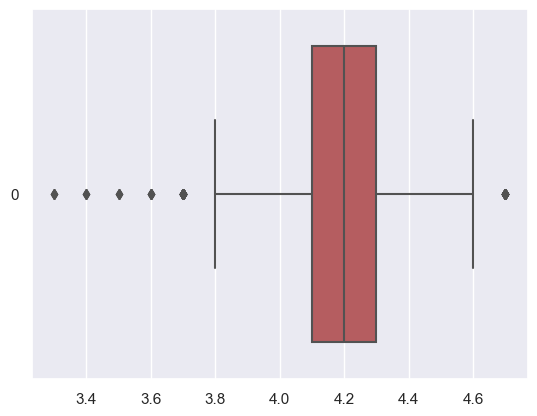

In [60]:
sb.boxplot(data=Cleaned['Stars'], orient = "h", color = 'r')

In [61]:
Cleaned["Stars"].describe()

count    922.000000
mean       4.185575
std        0.235729
min        3.300000
25%        4.100000
50%        4.200000
75%        4.300000
max        4.700000
Name: Stars, dtype: float64

In [62]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [63]:
outliers = find_outliers_IQR(Cleaned["Stars"])
print("number of outliers for Stars: "+ str(len(outliers)))
print('\n')
# Number of null = 943-922 = 21 null values for Stars
print("number of NULL for Stars: 21")

number of outliers for Stars: 88


number of NULL for Stars: 21


We see that there are afew null and outliers in Stars which may affect the prediction model later

In [64]:
# Numeric Predictors
Cleaned[['Stars','Ram','Rom', 'Rear Camera', 'Front Camera', 'Price', 'Battery', 'ScreenSize']].describe()

Stars         Ram         Rom  Rear Camera  Front Camera  \
count  922.000000  943.000000  943.000000   943.000000    943.000000   
mean     4.185575    3.438625   68.555938    27.291220      6.925769   
std      0.235729    3.112900   69.838110    31.572795      8.645459   
min      3.300000    0.000000    0.000000     0.000000      0.000000   
25%      4.100000    0.000000    0.000000     3.000000      0.000000   
50%      4.200000    4.000000   64.000000    12.000000      5.000000   
75%      4.300000    6.000000  128.000000    50.000000     12.000000   
max      4.700000   12.000000  512.000000   200.000000     60.000000   

             Price      Battery  ScreenSize  
count   943.000000   943.000000  943.000000  
mean    223.320365  3553.969247    4.896543  
std     291.478165  1871.337150    2.190757  
min      11.904000     0.000000    0.000000  
25%      23.984000  1450.000000    2.400000  
50%     151.984000  4800.000000    6.440000  
75%     263.984000  5000.000000    6.600000  
max    2159.984000  7000.000000    7.000000

In [65]:
# Categorical Predictors
Cleaned[['Processor','Brand','Color','Expandable','DisplayType']].describe()

Processor Brand Color  Expandable DisplayType
count        943   943   943       943.0         943
unique       121    40   151         2.0          19
top           NA  itel    NA         1.0     Display
freq         339   120   170       584.0         245

Not much informations yet
- There are phones without length and battery data
- Ram, Rom Front camera have no lower outliers as the 25% is same as the min
- the processor and color have a very large amount of rows without data, therefore most likely unable to use for prediction
- Processor have 339 NA rows
- Color have 170 NA rows
- Intel is the brand with the highest amout of rows(120)
- There are 584 phones that support expandable memory
- There are 19 type of Display with 'Display' being the most commmon(245)


## Correlation stars vs all numerical predictor

In [66]:
correlation_matrix = Cleaned.corr()
correlation_matrix["Stars"]

Unnamed: 0     -0.210864
Stars           1.000000
Ram             0.474569
Rom             0.477503
Rear Camera     0.340169
Front Camera    0.383422
ScreenSize      0.549877
Price           0.494330
Battery         0.495736
Name: Stars, dtype: float64

## Correlation
Rear and Front camera have a weak positive correlation with stars
Ram, Rom, price, battery and screen size have a moderate positive coorellation

#### Time for some visualizations to check the distribution of the predictor variables, one by one, for both Numeric and Categorical predictors. However, we will not just do it sequentially as they appear in the dataset as columms. We will do based on what the variable describe. <br>
 -Memory: Ram, Rom, Expandable<br>
 -Camera: Rear, Front <br>
 -Display: ScreenSize, DisplayType <br>
 -Names: Names, Brand, Color <br>
 -Processor <br>
 -Battery <br>
 -Price <br>
 

### Predictor corresponding to Memory (Ram, Rom, Expandable)

<AxesSubplot:xlabel='Ram', ylabel='Count'>

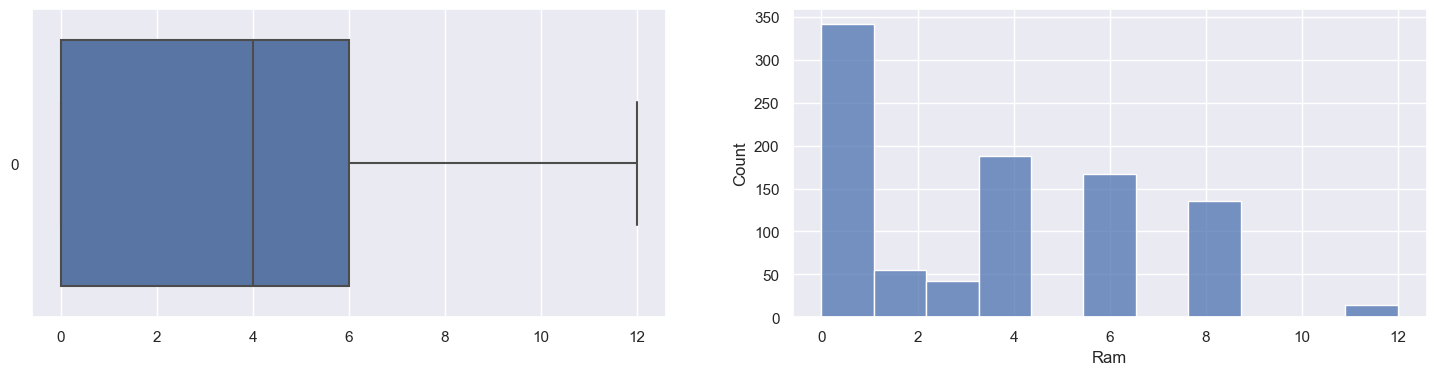

In [67]:
#Ram 
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = Cleaned['Ram'], orient = "h", ax = axes[0])
sb.histplot(data = Cleaned['Ram'], ax = axes[1])

- Data are generally skewed to the right, with no outliers <br>
- 0 have the highest count for RAM and 12 have the lowest count<br>
- from the histogram generally as ram increases the count decrease<br>

<AxesSubplot:xlabel='Rom', ylabel='Count'>

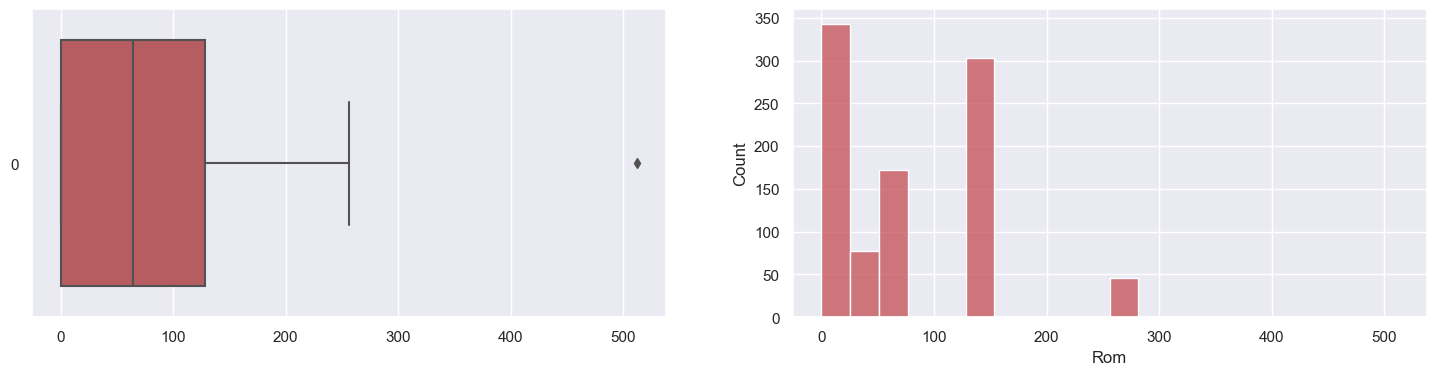

In [68]:
#Rom
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = Cleaned['Rom'], orient = "h", ax = axes[0], color = 'r')
sb.histplot(data = Cleaned['Rom'], ax = axes[1],color = 'r')

- There is outliears whose Rom are above 500GB <br>
- generally the Rom are around 0 to ~250GB <br>
- 0 have the highest count for ROM <br>
- unlikely to have phone without rom storage, might need to be replace with median or removed for a more accurate analysis<br>

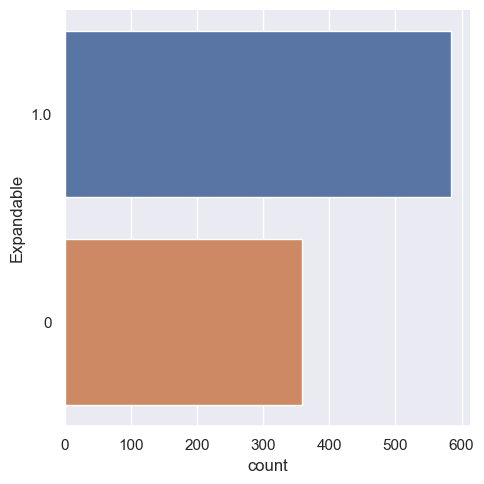

In [69]:
#expandable
sb.catplot(y = 'Expandable', data = Cleaned, kind = "count")

- Most phone supports expandable memory (1) <600
- <400 phone does not support expandable memory

### Predictor corresponding to Processor

<AxesSubplot:xlabel='Count', ylabel='Processor'>

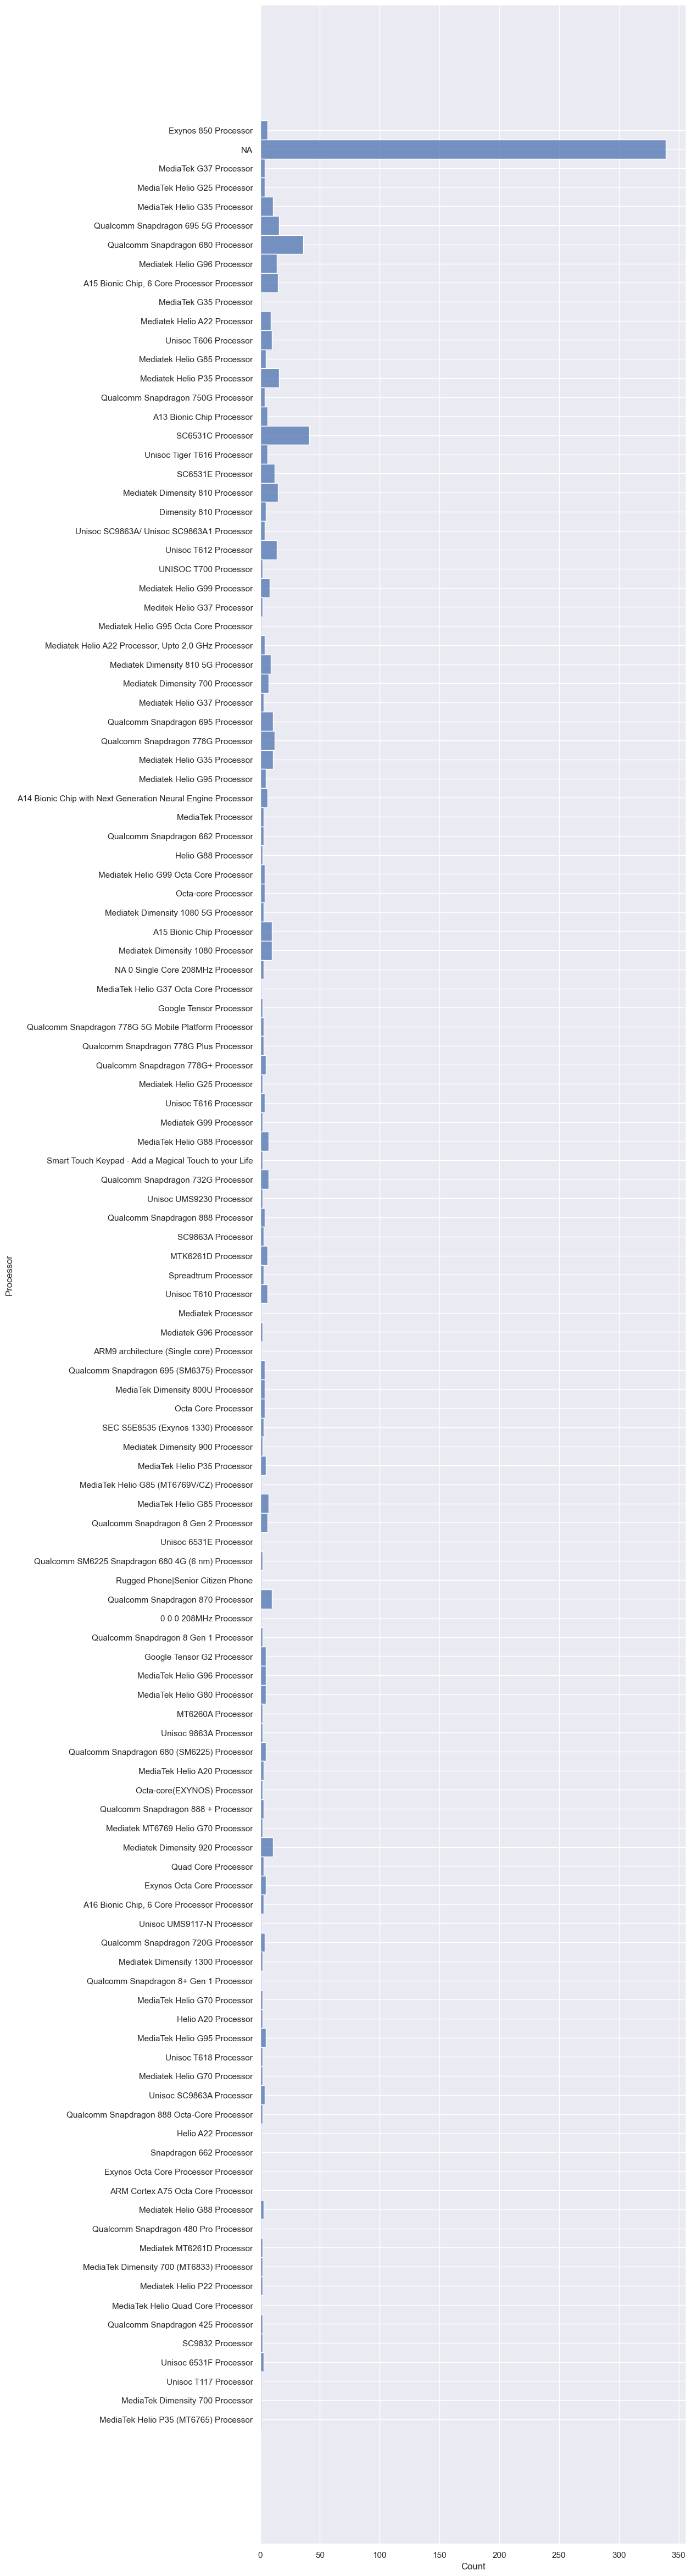

In [70]:
fig, ax = plt.subplots(figsize=(10, 60))

processor_counts = Cleaned["Processor"].value_counts()

# Get order based on count
processor_order = processor_counts.index.tolist()

# Create histogram with sorted order
#sb.barplot(, orient = 'h', y=Cleaned["Processor"], order =processor_order)
sb.histplot(data=Cleaned, y="Processor",bins=len(processor_order))


The mojority of the phone listed does not have their processor details, thus processor might not be the best predictor unless cleaning is done.
there are very scarce phones that uses the same processor

### Predictor corresponding to color

<AxesSubplot:xlabel='Count', ylabel='Color'>

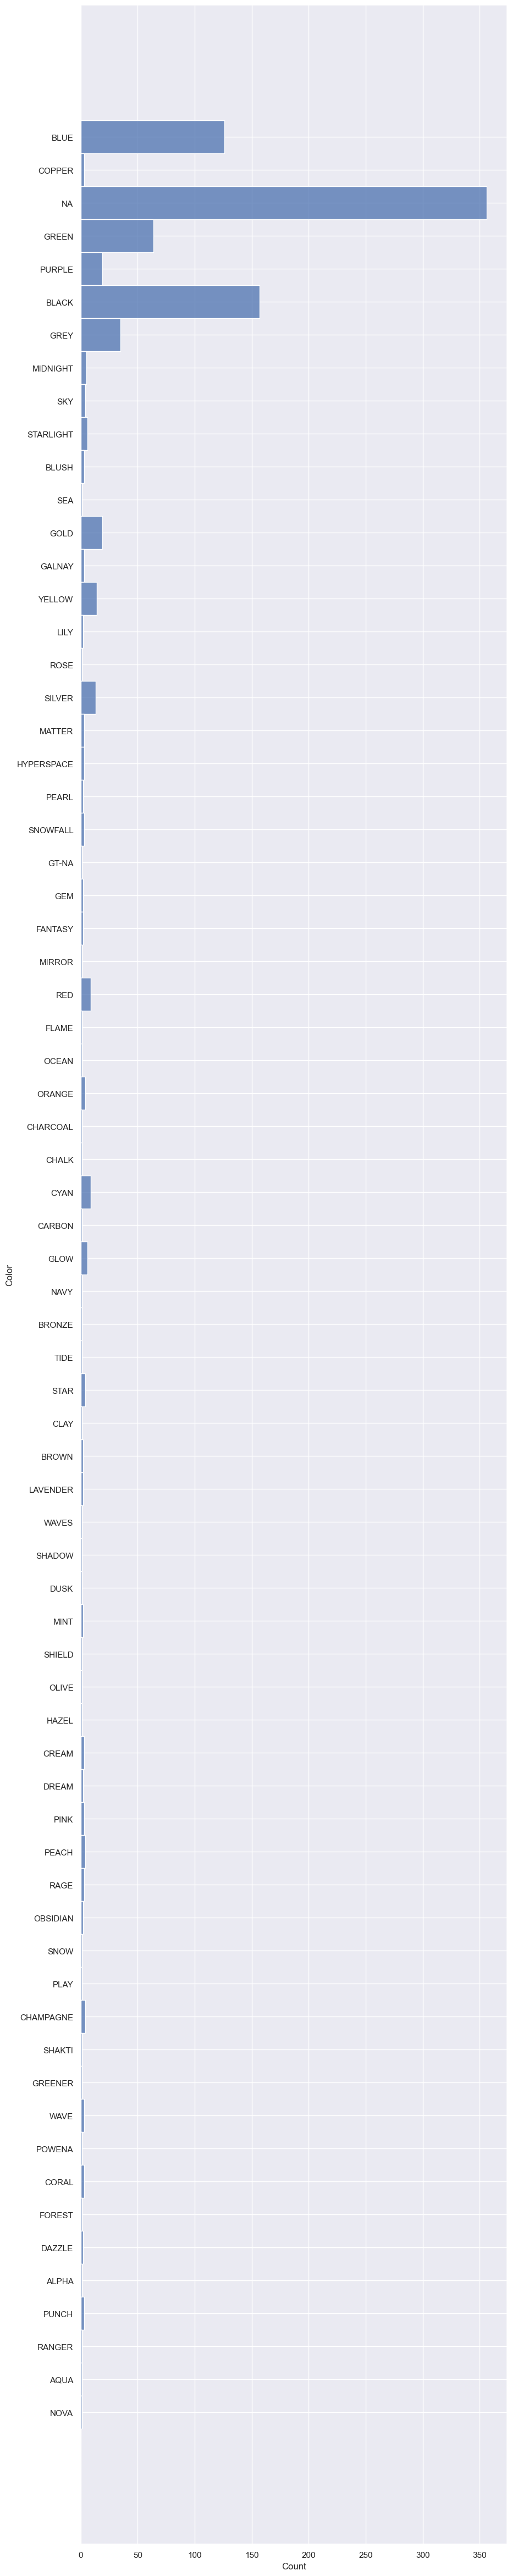

In [71]:
# Replace rows containing digits with NaN values
Cleaned['Color'] = Cleaned['Color'].replace(to_replace=r'\d+', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='X', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='XNA+', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='KNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='XNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='ENA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='TA-NA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='DS', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='GT-ENA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='RNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='WIFI', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='POWERNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='FLIP', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='KEYPAD', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='ULTRA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='NEW', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='SUPER', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='JNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='ONYNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='FERRARI', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='NA/NA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='TALKING', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='NAN', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='NAI', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='NANA+', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='ANA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='YUVA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='POWER', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace="PRODUCT\)RED", value='RED', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='PRO', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='PLUS', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='KUNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='POWNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='GULNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='SNA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='RAFALE', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='NAA+', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='NAA', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='NA\+', value='NA', regex=True)
Cleaned['Color'] = Cleaned['Color'].replace(to_replace='MNA', value='NA', regex=True)
Cleaned['Color'].unique()


#plot
fig, ax = plt.subplots(figsize=(10, 60))
sb.histplot(y = 'Color', data = Cleaned, ax=ax)


-A large number of phones do not have a declared color <br>
- other than NA the next highest is black <br>
- there are too many color that might be too similar eg. blue&sea, copper&gold but we can just decide that they are the same color <br>

### Predictor corresponding to Camera(Front, Rear)

<AxesSubplot:xlabel='Rear Camera', ylabel='Count'>

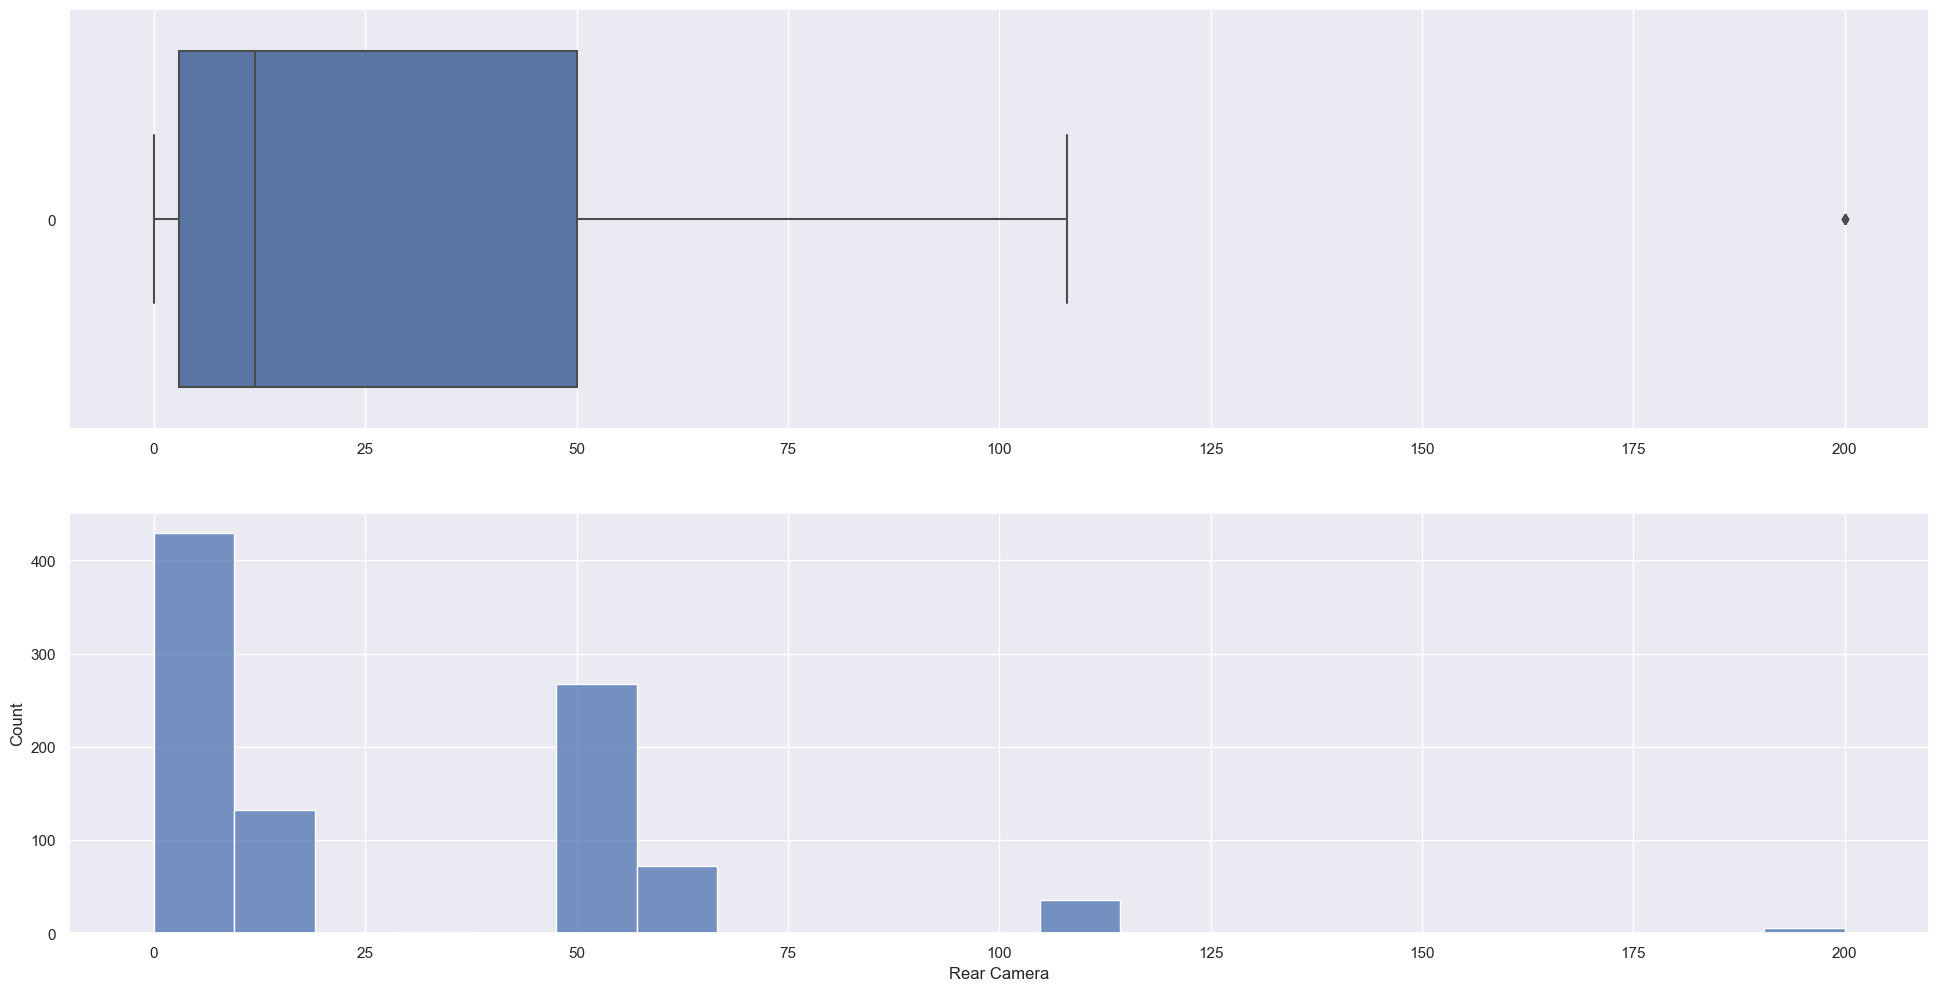

In [72]:
#rear Camera
# Set up matplotlib figure with two subplots
f, axes = plt.subplots(2, 1, figsize=(24, 12))

sb.boxplot(data=Cleaned["Rear Camera"], orient="h", ax=axes[0])
sb.histplot(data=Cleaned["Rear Camera"], ax=axes[1])

<AxesSubplot:xlabel='Front Camera', ylabel='Count'>

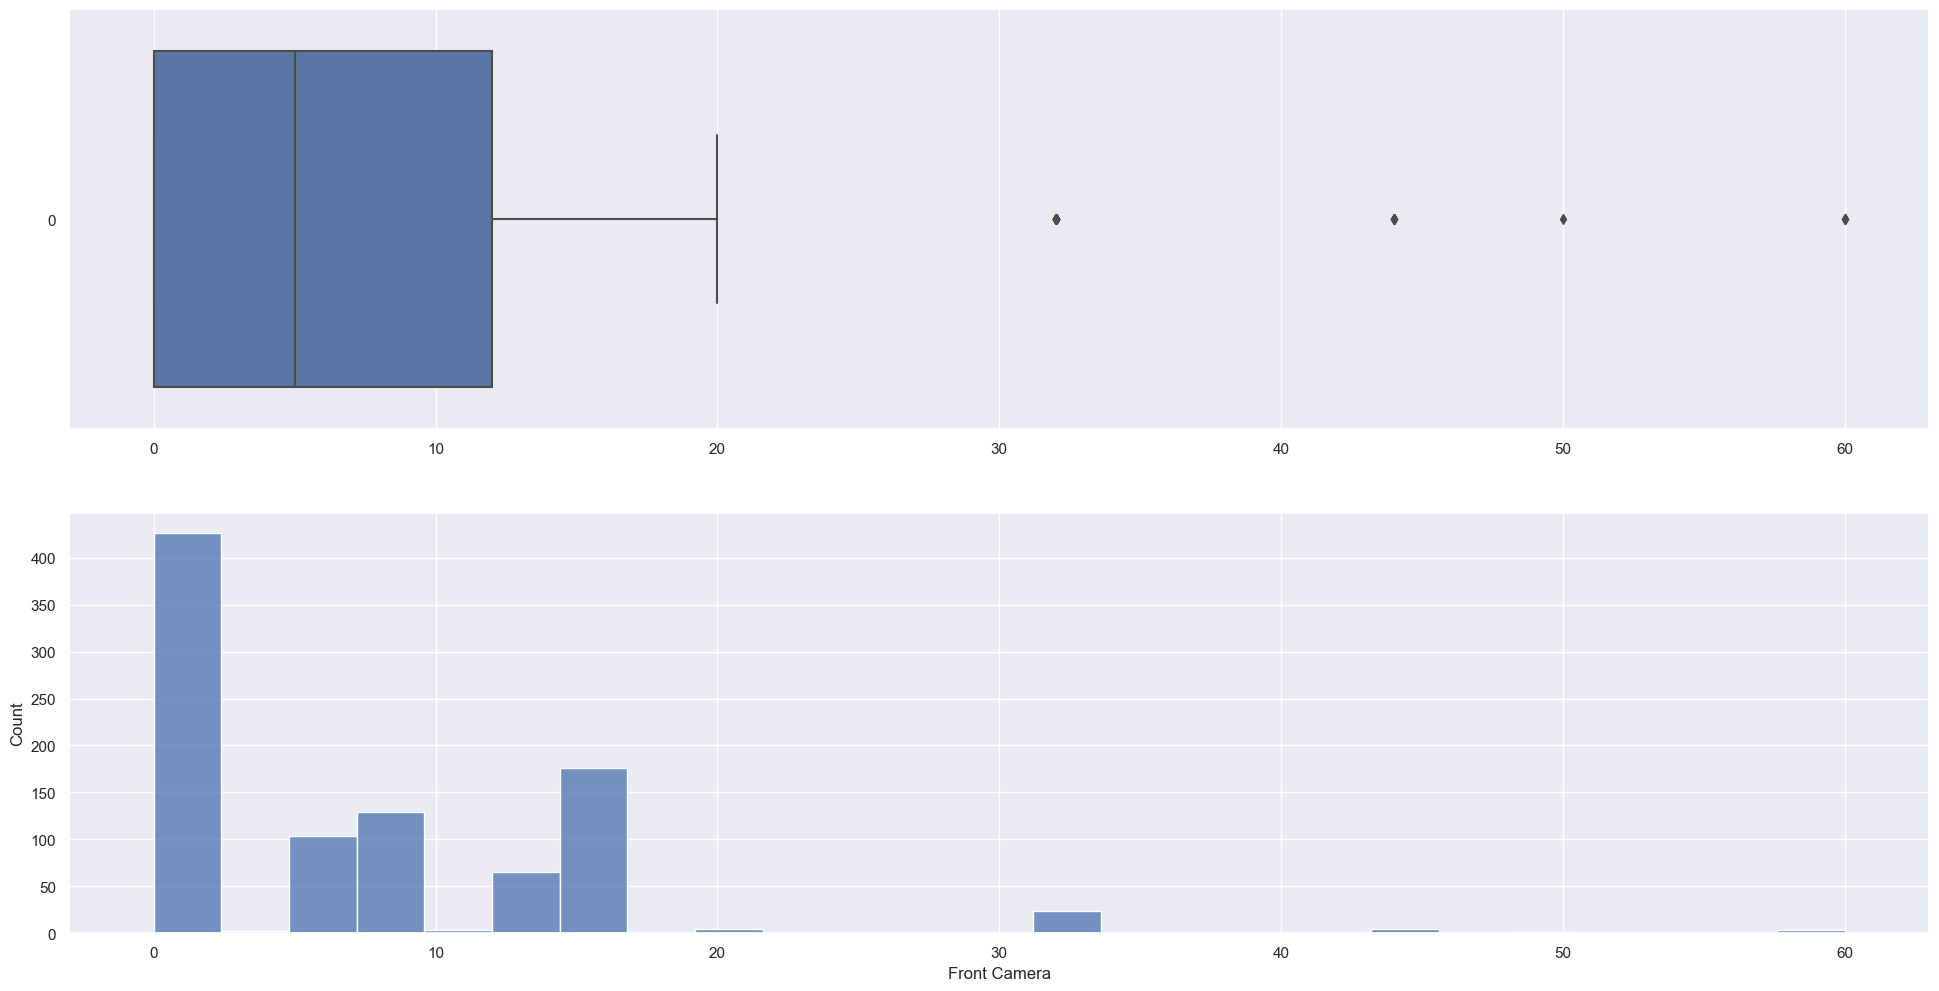

In [73]:
#Front Camera
# Set up matplotlib figure with two subplots
f, axes = plt.subplots(2, 1, figsize=(24, 12))

sb.boxplot(data=Cleaned["Front Camera"], orient="h", ax=axes[0])
sb.histplot(data=Cleaned["Front Camera"], ax=axes[1])

### Predictor corresponding to Screen(ScreenSize, ScreenType)

<AxesSubplot:xlabel='ScreenSize', ylabel='Count'>

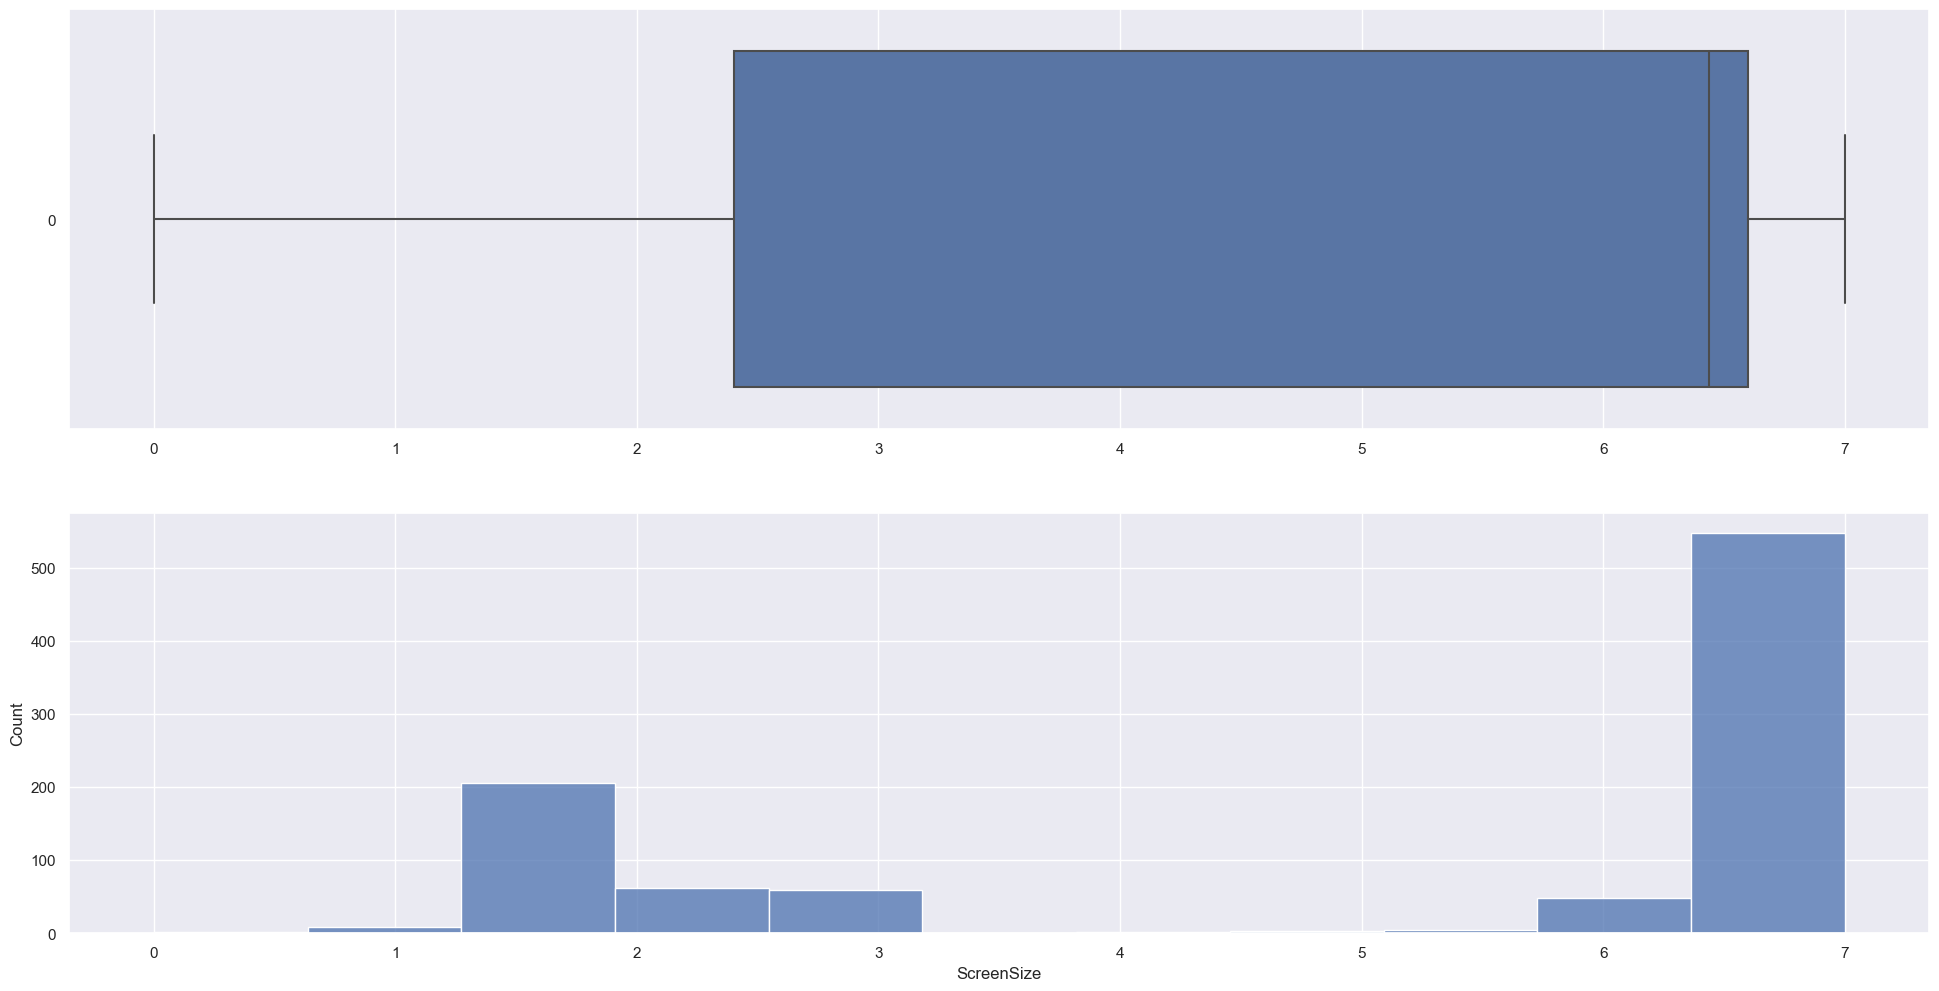

In [74]:
#screen Size
# Set up matplotlib figure with two subplots

f, axes = plt.subplots(2, 1, figsize=(24, 12))

sb.boxplot(data=Cleaned["ScreenSize"], orient="h", ax=axes[0])
sb.histplot(data=Cleaned["ScreenSize"], ax=axes[1])

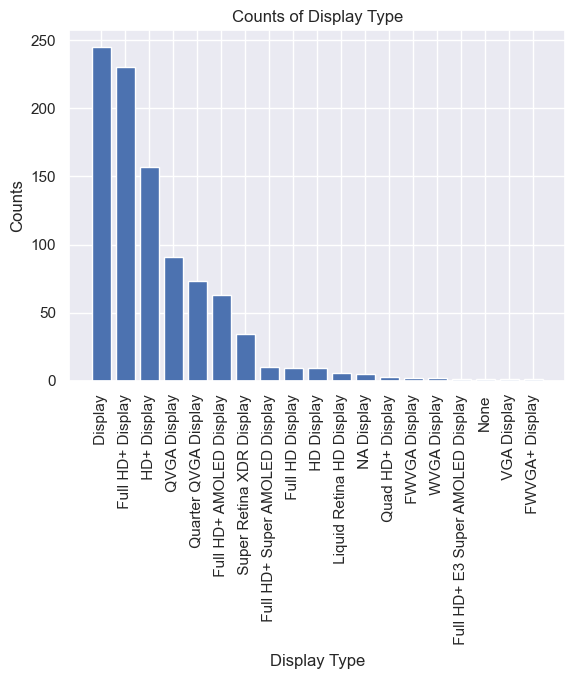

In [75]:
#screenType
# get the counts of unique values in the "DisplayType" column
counts = Cleaned['DisplayType'].value_counts()

# create a bar chart
plt.bar(counts.index, counts)

# set the title and axis labels
plt.title("Counts of Display Type")
plt.xlabel("Display Type")
plt.ylabel("Counts")

# adjust the margins and rotate the x-axis labels
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=90)

# show the plot
plt.show()

### Predictor corresponding to Brand

<AxesSubplot:xlabel='Count', ylabel='Brand'>

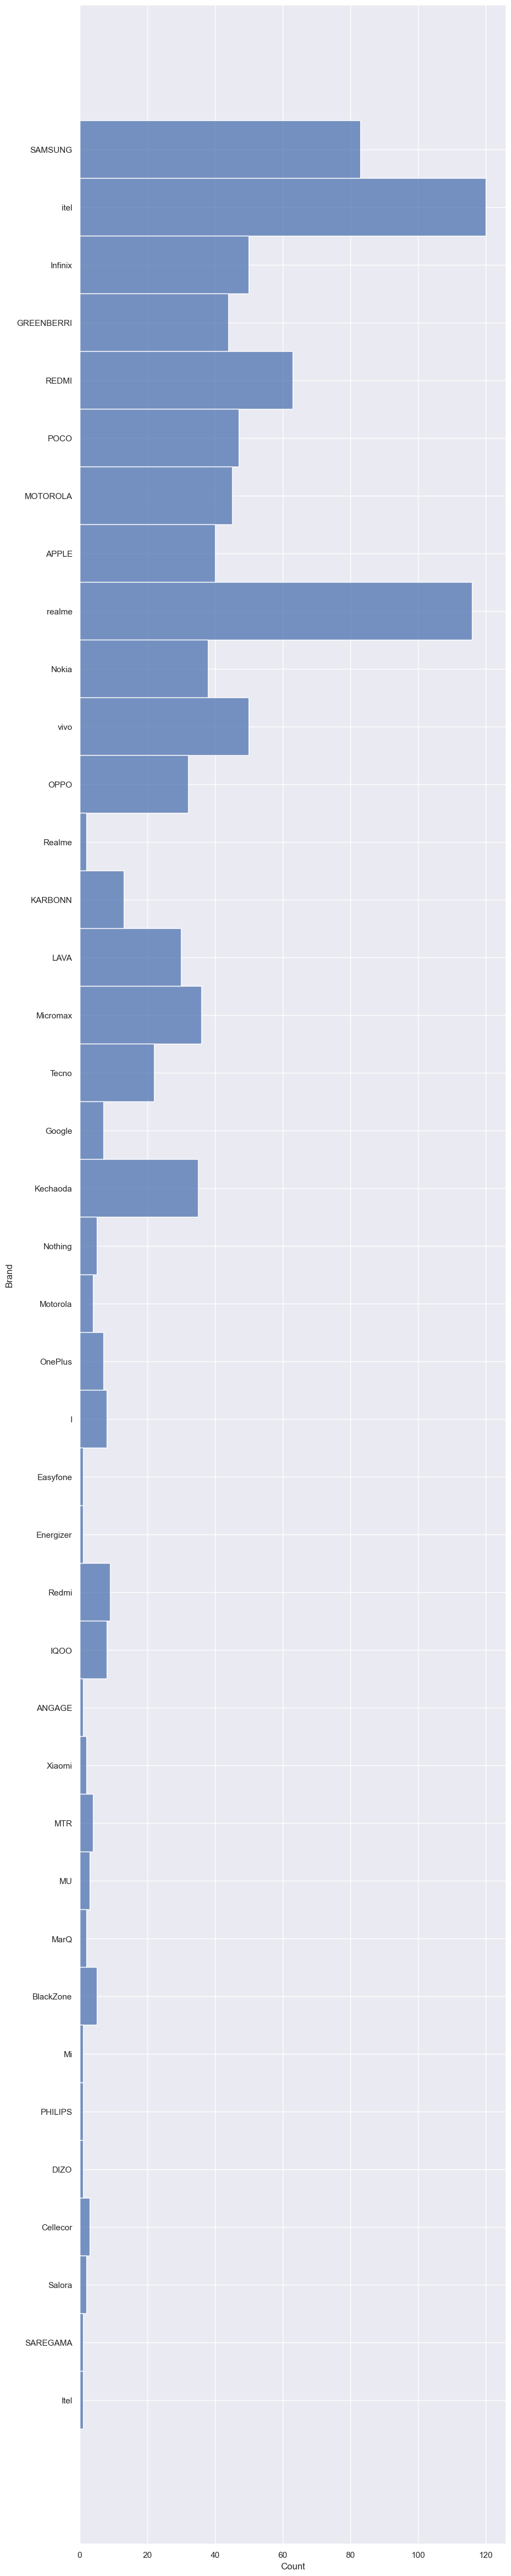

In [76]:
#plot
fig, ax = plt.subplots(figsize=(10, 60))
sb.histplot(y = 'Brand', data = Cleaned, ax=ax)

### Predictor corresponding to Battery

<AxesSubplot:>

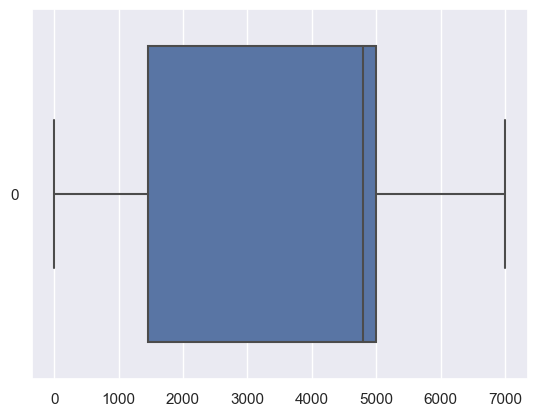

In [77]:
#Battery exploratory analysis

sb.boxplot(data=Cleaned['Battery'], orient = "h", color = 'b')

### Predictor corresponding to Price

<AxesSubplot:>

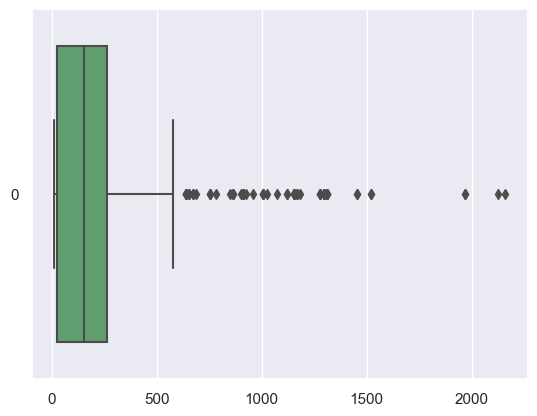

In [78]:
#Price exploratory analysis

#Box plot for price
sb.boxplot(data=Cleaned['Price'], orient = "h", color = 'g')

# Relationship with Rating

## Stars with Ram, Rom, Expandable, Processor, Color

Correlation:  0.4745694857863057


<Figure size 1600x800 with 0 Axes>

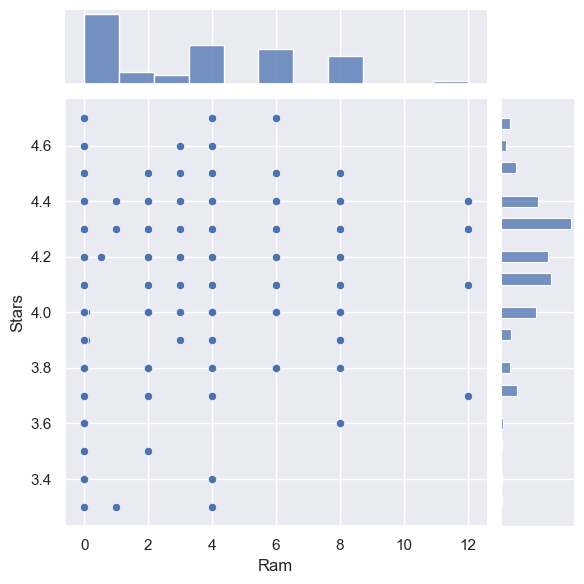

In [79]:
#RAM

f = plt.figure(figsize=(16, 8))
correlation = Cleaned['Ram'].corr(Cleaned['Stars'])

print('Correlation: ',correlation)
sb.jointplot(x = 'Ram', y = 'Stars', data = Cleaned)
plt.show()

### Ram with stars
- from the scatter plot there is no obvious relationship <br>
- the corelation is 0.474 which have a weak positive correlation <br>
- Ram might be a potential predictor for stars <br>

Correlation:  0.47750271813509204


<Figure size 1600x800 with 0 Axes>

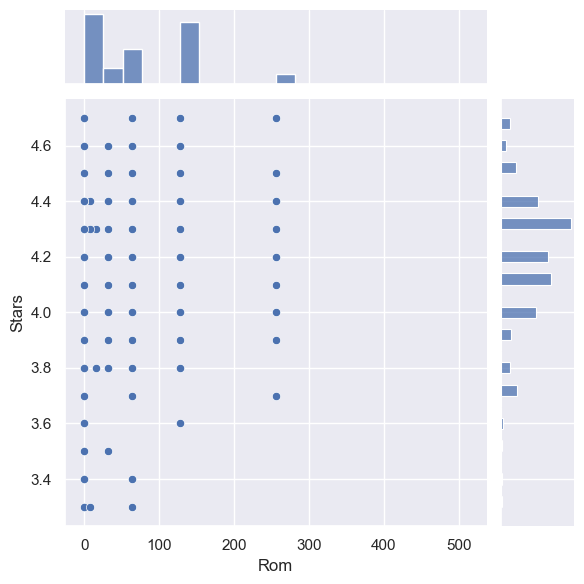

In [80]:
#ROM

f = plt.figure(figsize=(16, 8))
correlation = Cleaned['Rom'].corr(Cleaned['Stars'])

print('Correlation: ',correlation)
sb.jointplot(x = 'Rom', y = 'Stars', data = Cleaned)
plt.show()

### Rom with stars
- from the scatter plot there is no obvious relationship <br>
- the corelation is 0.477 which have a weak positive correlation <br>
- Rom might be a potential predictor for stars <br>

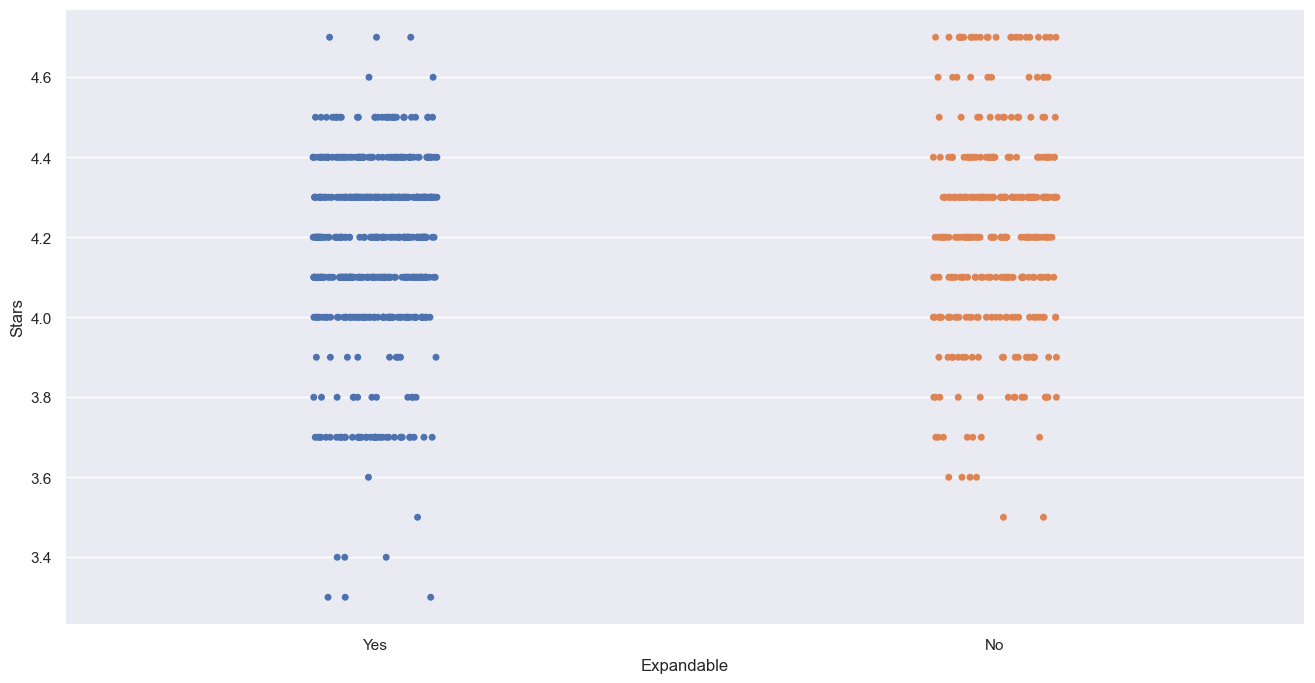

In [81]:
#expandable vs Stars

Cleaned['Expandable'] = Cleaned['Expandable'].replace(to_replace=1, value='Yes', regex=True)
Cleaned['Expandable'] = Cleaned['Expandable'].replace(to_replace='0', value='No', regex=True)

f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Expandable', y = 'Stars', data = Cleaned)
plt.show()

### Expandable with stars
- from the scatter plot there is no obvious relationship <br>
- how ever phone with expandable memory have ratings that are 3.4 & below
- Phones without expandable memomry seems to have more datapoint for stars above 4.6 <br>
- Expandable memory might be a good predictor <br>

<AxesSubplot:xlabel='Stars', ylabel='Processor'>

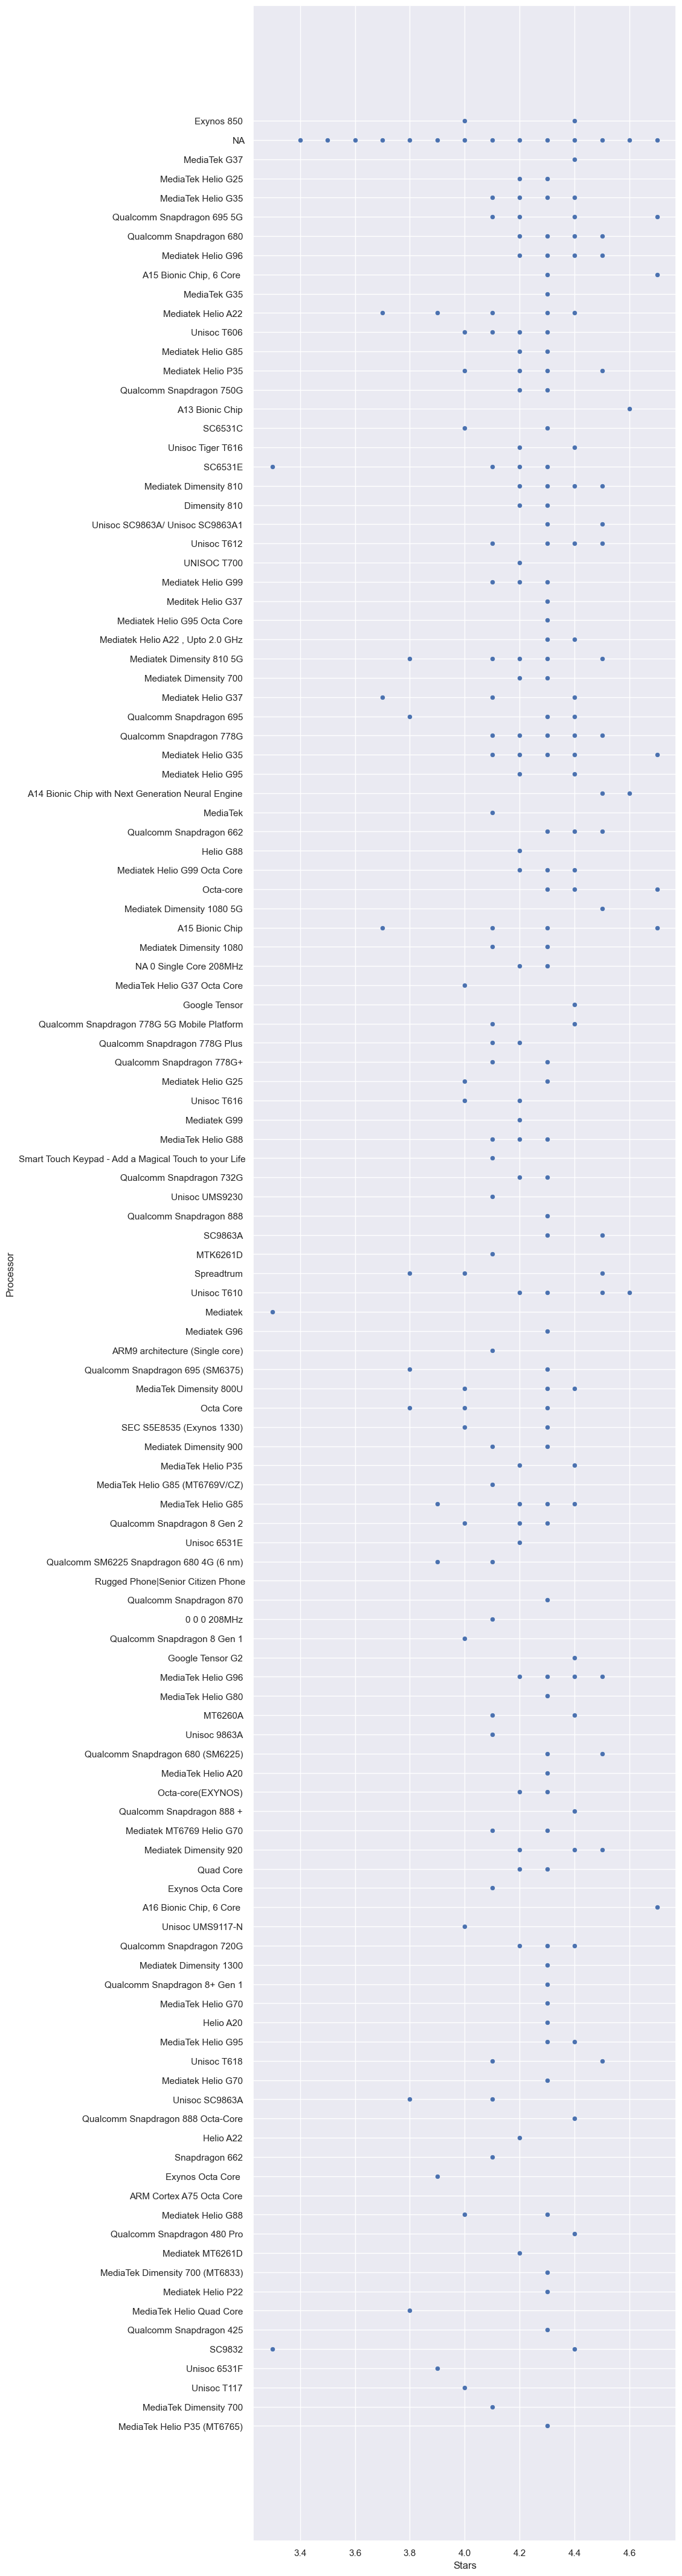

In [82]:
#Processor

Cleaned['Processor'] = Cleaned['Processor'].str.replace('Processor', '')

fig, ax2 = plt.subplots(figsize=(10, 60))

# adjust the spacing between the subplots
plt.subplots_adjust(top=0.9, right=0.9, left=0.2, bottom=0.2)
sb.scatterplot(x = 'Stars', y = 'Processor', data = Cleaned,ax=ax2)


### Processor with stars

- There is no obvious relationship <br>
- NA seems to have the Stars of all values
- SC9832 have the lowest stars

<AxesSubplot:xlabel='Stars', ylabel='Color'>

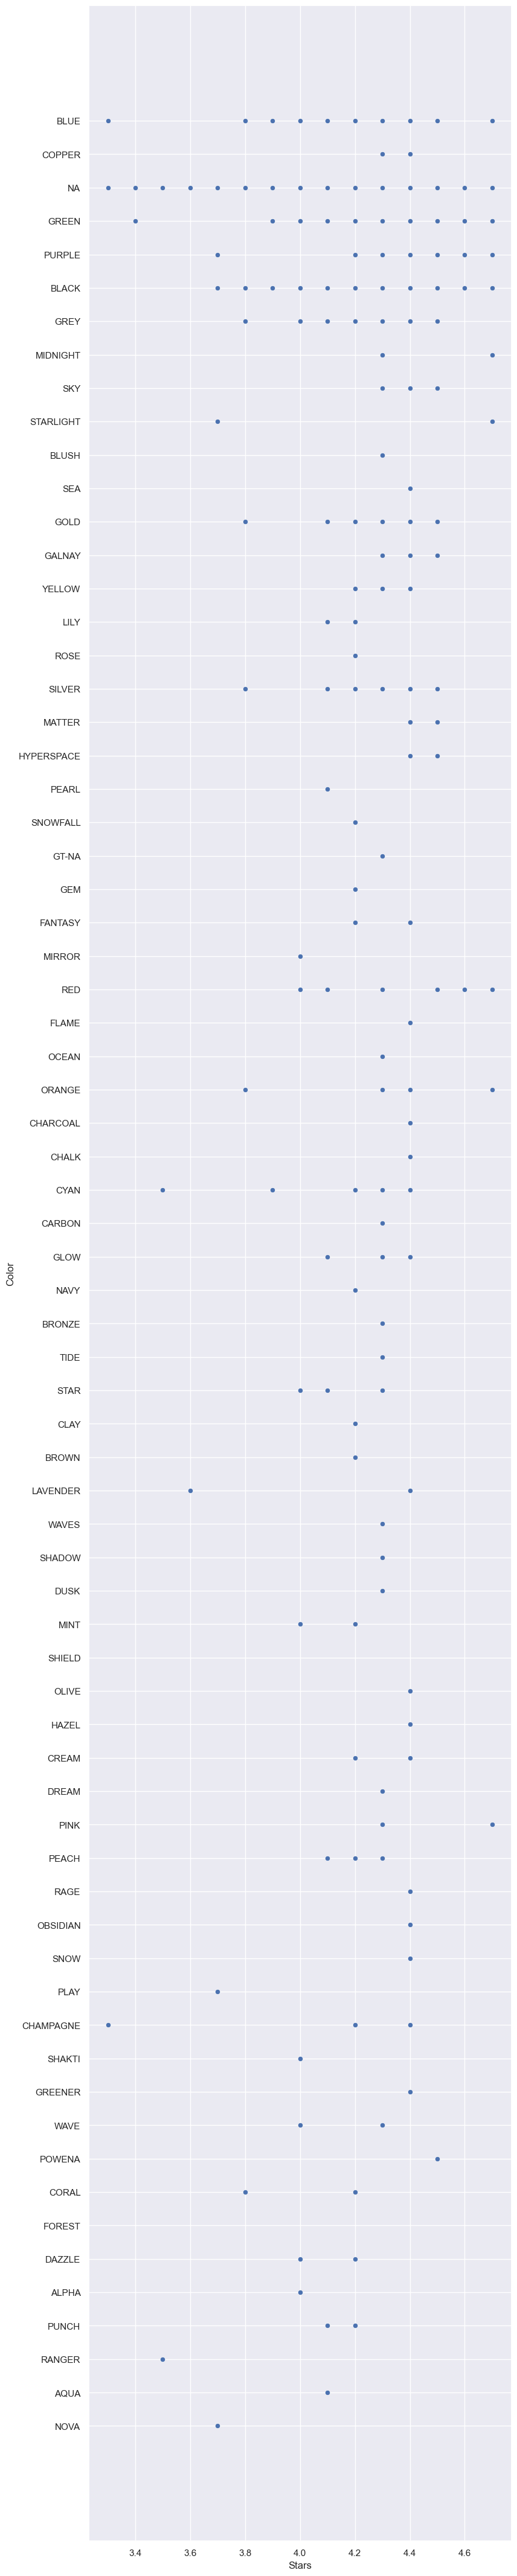

In [83]:
#Color

fig, ax2 = plt.subplots(figsize=(10, 60))

# adjust the spacing between the subplots
plt.subplots_adjust(top=0.9, right=0.9, left=0.2, bottom=0.2)
sb.scatterplot(x = 'Stars', y = 'Color', data = Cleaned,ax=ax2)

### Color with Stars
- NA have data for all values of stars
- copper have quite a high stars
- midnight have a high Stars
- The lowest stars is from champagne color
- although black is the highest color aside from NA, the ratings are generally above 3.7

## Stars with Rear Camera, Front Camera, ScreenSize, ScreenType

### Rear Camera with Stars
Generally the corelation is positive, which means when MP of rear camera increase, the value of Stars increase. However the corelation is too weak (<0.5) so Rear Camera may not be a good variable to determine Stars.

In [84]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([Cleaned["Rear Camera"], Cleaned['Stars']], axis=1).reindex(Cleaned["Rear Camera"].index)
jointDF


Rear Camera  Stars
0            50.0    4.4
1            50.0    4.4
2             0.0    4.1
3            50.0    4.4
4            50.0    4.4
...           ...    ...
1138         64.0    4.0
1139         13.0    4.3
1140          8.0    4.1
1141          3.0    4.6
1142         12.0    NaN

[943 rows x 2 columns]

0.34016946680243615


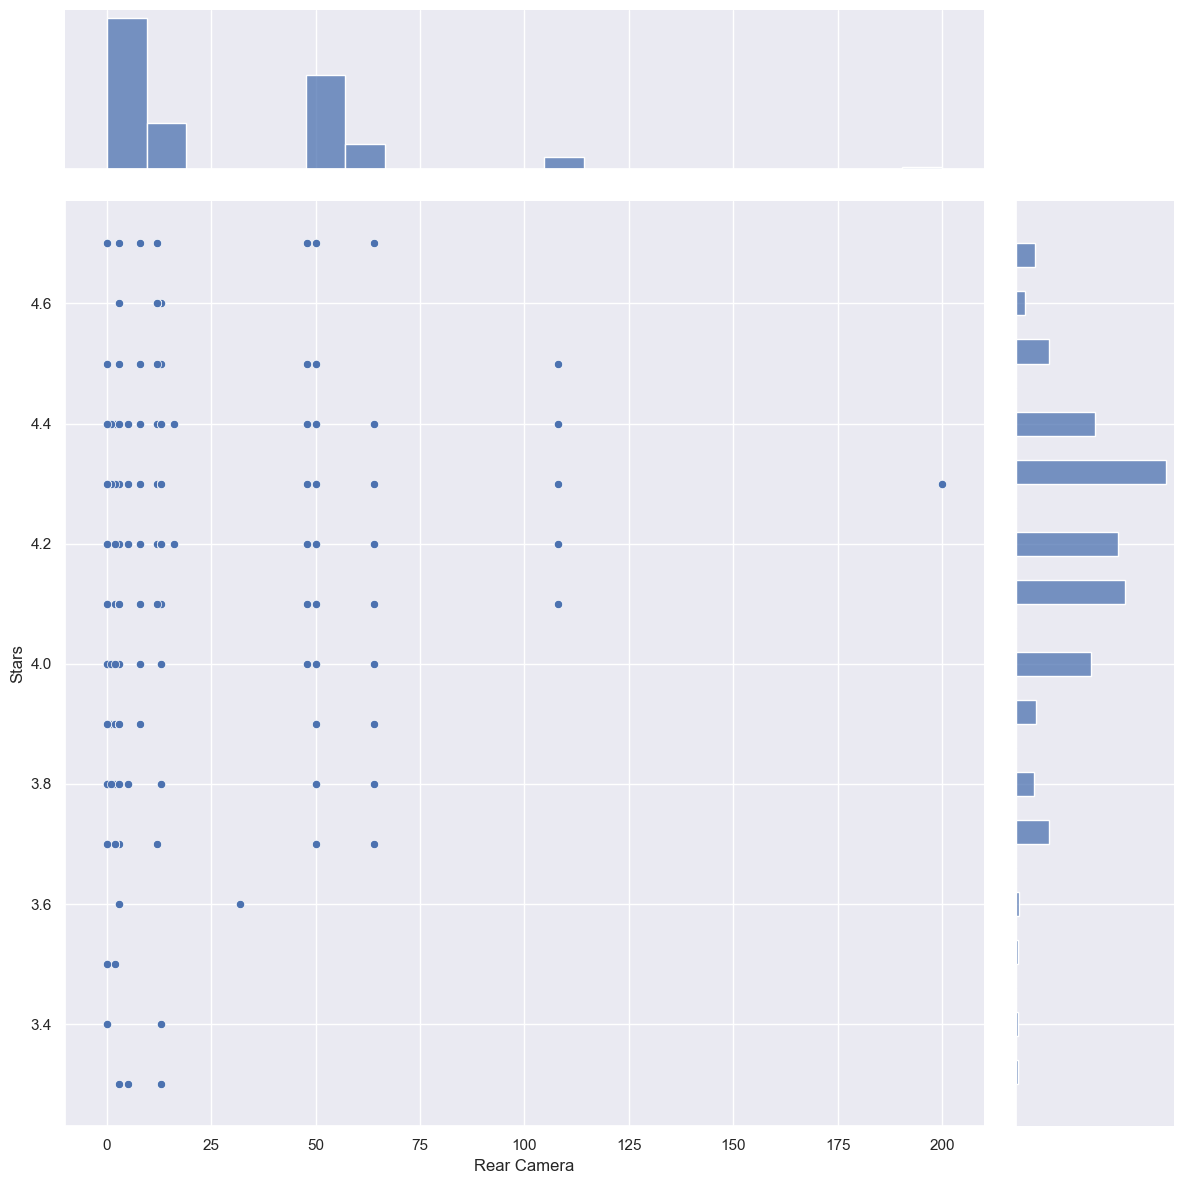

In [85]:
corr1 = Cleaned["Rear Camera"].corr(Cleaned["Stars"])

print(corr1)

# Draw jointplot of rear camera VS Stars in the joined dataframe
sb.jointplot(data=jointDF, x="Rear Camera", y="Stars", height=12)

### Front Camera with Stars
Generally the corelation is positive, which means when MP of rear camera increase, the value of Stars increase. However the corelation is too weak (<0.5) so Rear Camera may not be a good variable to determine Stars.

In [86]:
# Create a joint dataframe by concatenating the two variables
jointDF2 = pd.concat([Cleaned["Front Camera"], Cleaned['Stars']], axis=1).reindex(Cleaned["Rear Camera"].index)
jointDF2

Front Camera  Stars
0              8.0    4.4
1              8.0    4.4
2              0.0    4.1
3              8.0    4.4
4              8.0    4.4
...            ...    ...
1138          44.0    4.0
1139           0.0    4.3
1140           0.0    4.1
1141           0.0    4.6
1142          12.0    NaN

[943 rows x 2 columns]

0.3834221549452544


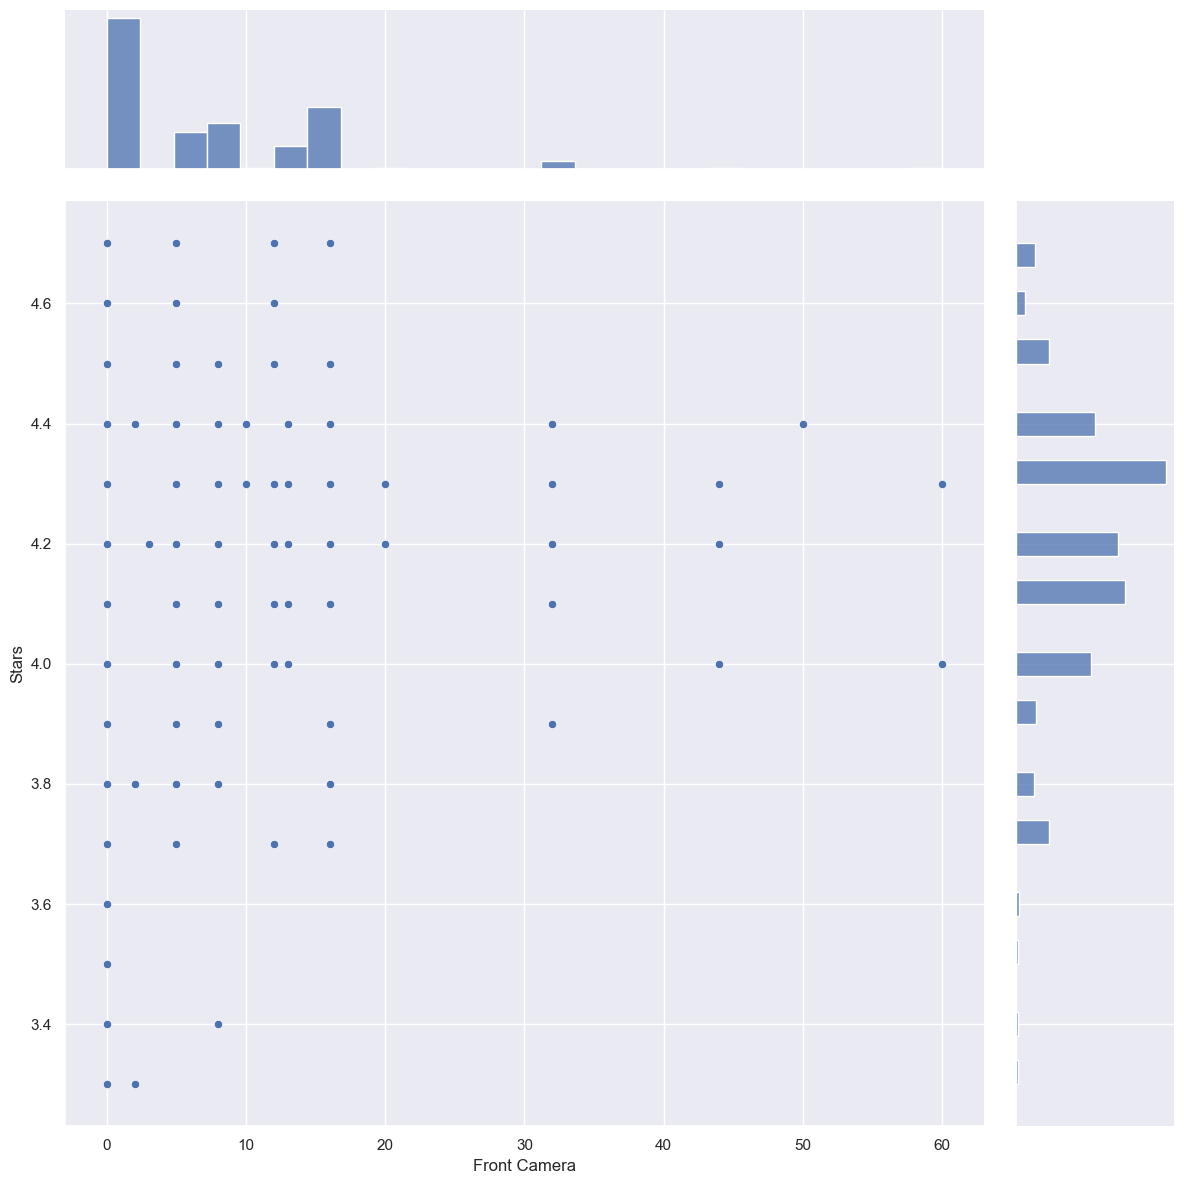

In [87]:
#print the correlationship
corr2 = Cleaned["Front Camera"].corr(Cleaned["Stars"])

print(corr2)

# Draw jointplot of Front camera VS Stars in the joined dataframe
sb.jointplot(data=jointDF2, x="Front Camera", y="Stars", height=12)

### ScreenSize with Stars

In [88]:
# Create a joint dataframe by concatenating the two variables
jointDF3 = pd.concat([Cleaned["ScreenSize"], Cleaned['Stars']], axis=1).reindex(Cleaned["Rear Camera"].index)
jointDF3

ScreenSize  Stars
0           6.60    4.4
1           6.60    4.4
2           1.80    4.1
3           6.60    4.4
4           6.60    4.4
...          ...    ...
1138        6.44    4.0
1139        6.08    4.3
1140        6.56    4.1
1141        2.40    4.6
1142        6.70    NaN

[943 rows x 2 columns]

0.5498768072960432


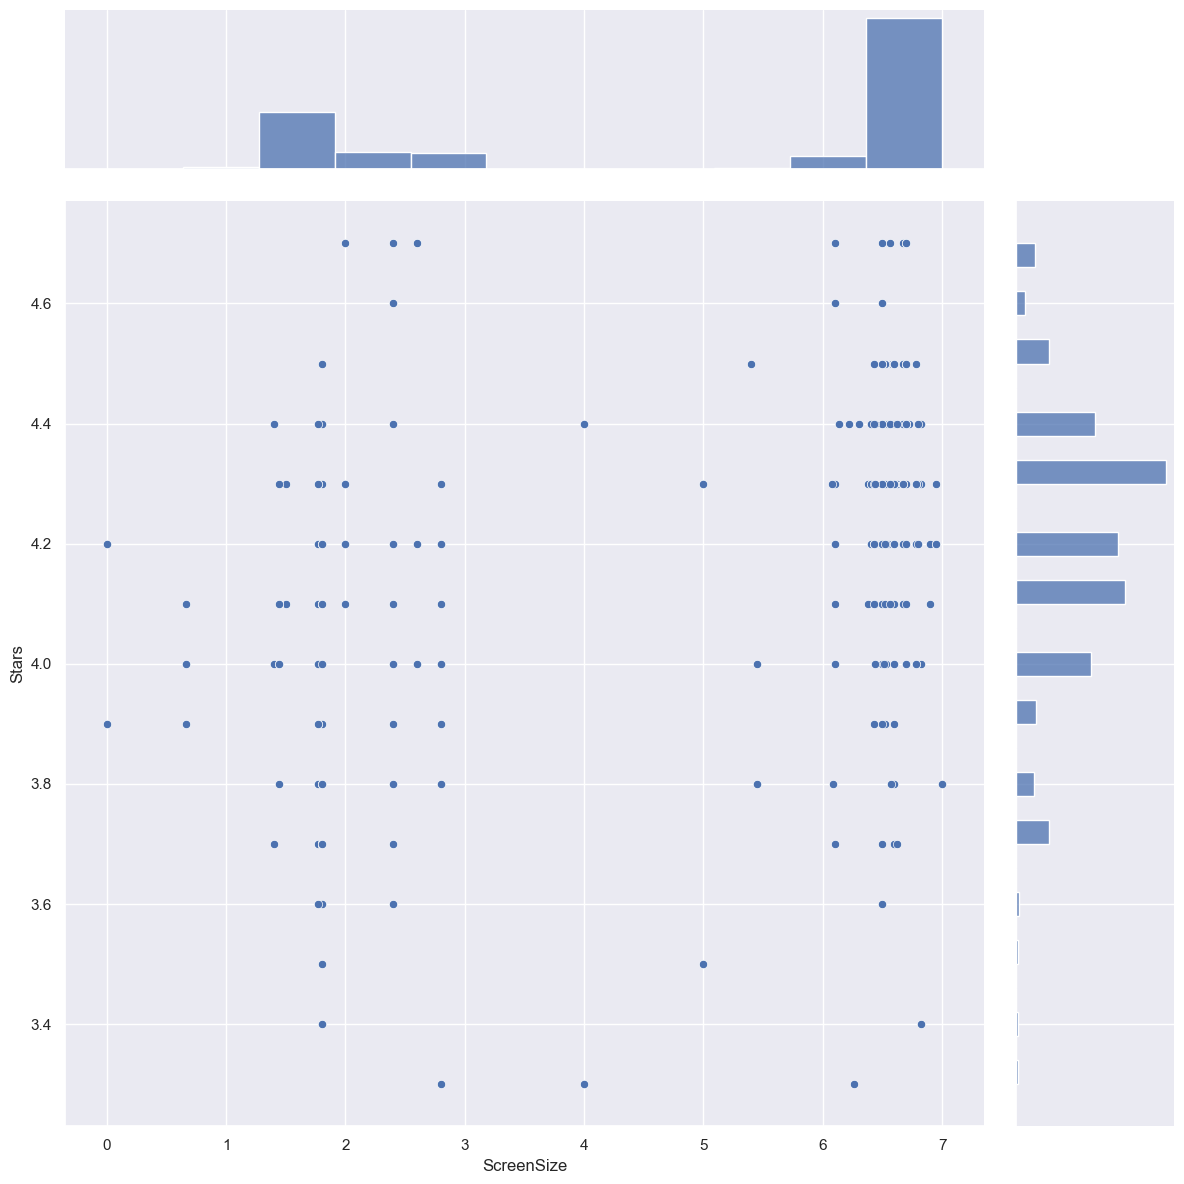

In [89]:
corr3 = Cleaned["ScreenSize"].corr(Cleaned["Stars"])

print(corr3)
# Draw jointplot of screensize vs stars 
sb.jointplot(data=jointDF3, x="ScreenSize", y="Stars", height=12)

The corelation is positive, which means when MP of front camera increase, the value of Stars increase. The corelation is abit weak as it is near 0.5. Possible factor in determining value of stars.

### DisplayType with Stars

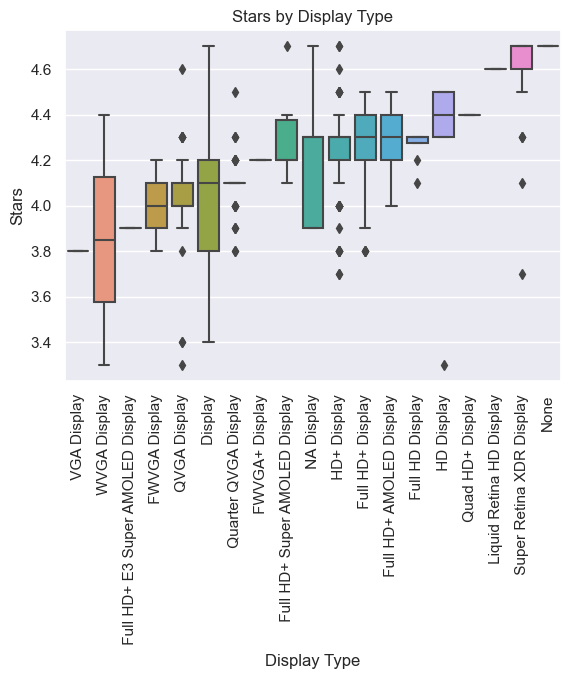

In [90]:
# box plot of Display Type according to their category
# Sort the data by the median value of Stars for each DisplayType
medians = Cleaned.groupby(['DisplayType'])['Stars'].median().sort_values()
Cleaned_sorted = Cleaned[Cleaned['DisplayType'].isin(medians.index)]

# Create a box plot with DisplayType on the x-axis and Stars on the y-axis
sb.boxplot(x="DisplayType", y="Stars", data=Cleaned_sorted, order=medians.index)

# Set the title and axis labels
plt.title("Stars by Display Type")
plt.xlabel("Display Type")
plt.ylabel("Stars")

# adjust the margins and rotate the x-axis labels
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=90)

# Show the plot
plt.show()

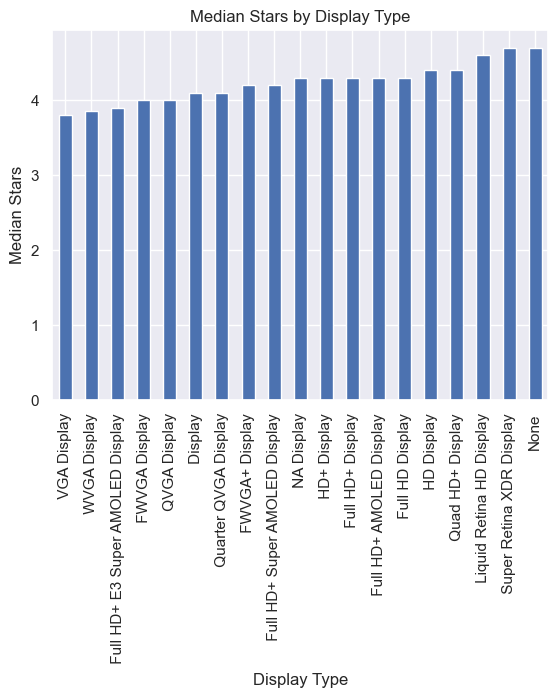

In [91]:
#plot median stars vs Display Type
# Calculate the median Stars value for each DisplayType and sort in ascending order
medians = Cleaned.groupby(['DisplayType'])['Stars'].median().sort_values(ascending=True)

# Plot the median values as a bar chart
ax = medians.plot(kind='bar')

# Set the title and axis labels
plt.title("Median Stars by Display Type")
plt.xlabel("Display Type")
plt.ylabel("Median Stars")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Stars with Brand, Battery, Price

### Battery with Stars

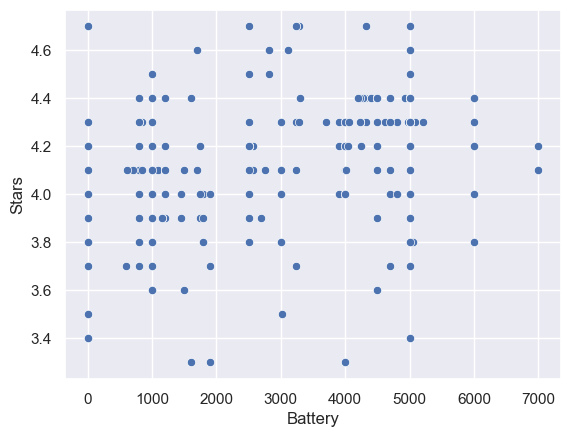

In [92]:
#Scatter plot for battery against stars

# Create the scatter plot
sb.scatterplot(x='Battery', y='Stars', data=Cleaned)

# Display the plot
plt.show()

### Battery with Stars analysis
As for the boxplot, it shows that the median value for battery as shown by the center line is very much to the right. This indicates that the battery data is heavily skewed to the right with the median being about 4800 mah. This suggests that smartphones in our data sample happens to have much higher battery capacity than normal.

As for the scatterplot for battery against stars, the heavy scatter of the points all over the graph clearly suggests that there is no clear strong relationship between battery and how users of the smartphones rate them. The circular nature of the data points is indicating that the relationship between battery and star rating is extremely weak and thus no strong conclusion can be made on how much a smartphone is valued by customers just based on its battery capacity alone. 

Thus we can safely conclude that potential buyers of smartphones do not generally value the battery capacity of their smartphones or if at all.

### Brand with Stars

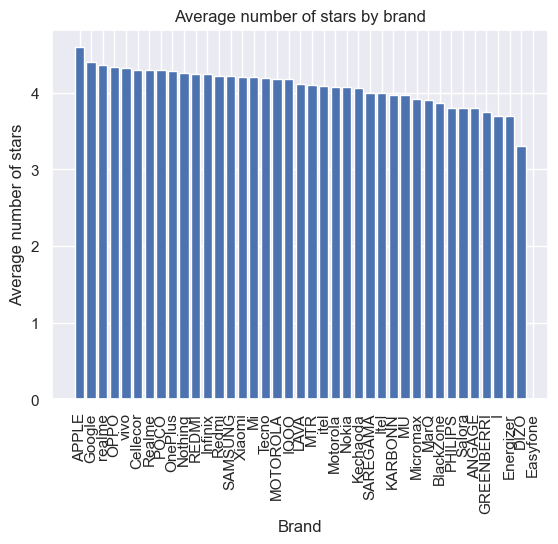

In [93]:
#Brand exploratory analysis

# Group by brand
grouped_df = Cleaned.groupby('Brand')['Stars'].mean().reset_index()

#Sort the data frame in a descending order
df_sorted = grouped_df.sort_values('Stars', ascending=False)

# Create the bar chart
plt.bar(df_sorted['Brand'], df_sorted['Stars'])

# Add axis labels and title
plt.xlabel('Brand')
plt.ylabel('Average number of stars')
plt.title('Average number of stars by brand')

#Rotate brand names
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Brand with Stars analysis
As shown by the bar chart above, Apple has the highest average rating among the entire list of brands while the brand with the lowest average star rating was DIZO.

In general, we can conclude the more wellknown and established brands such as Apple, Google and Oppo are much more likely to be rated higher by customers compared to brands that are less established by the public.

### Price with Stars

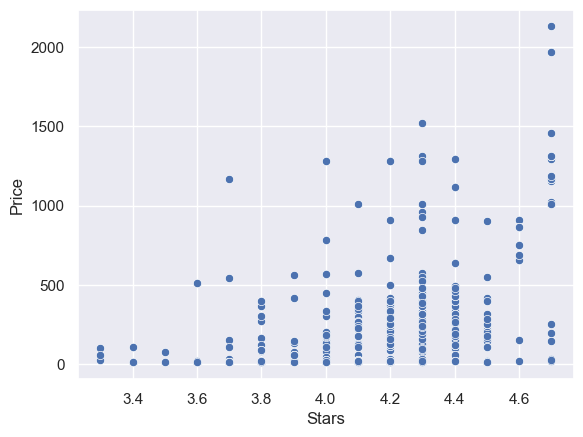

In [94]:
#Scatter plot for battery against stars

# Create the scatter plot
sb.scatterplot(x='Stars', y='Price', data=Cleaned)

# Display the plot
plt.show()

### Brand with Stars analysis
As for the boxplot for price, there are way too many outliers past the 1.5 of IQR while the right tail of the boxplot being much longer than that of the left tail. This means that the majority of the price data is concentrated towards the left of the box, and there are relatively few data points with high values that are pulling the right whisker out to a longer length. This shows that prices of the smartphones ranges extremely from a very low price to a very high one.

As for the scatter plot for price against star rating, it is generally observed that there are much more cheaper phones with a star rating above 4.0. It is also observed that the higher the price of a smartphone, it is much likely for it to be rated very highly.

What we can conclude is that, users generally prefer lower priced phones and most of them are generally liked by them however when the smartphones are cheaper, it is relativley more likely to be rated below 4.0 compared to smartphones that are priced much higher.

## Complex Relationships with Stars
- Used some of the highest coorelations we have 

### Ram&Rom Vs Stars

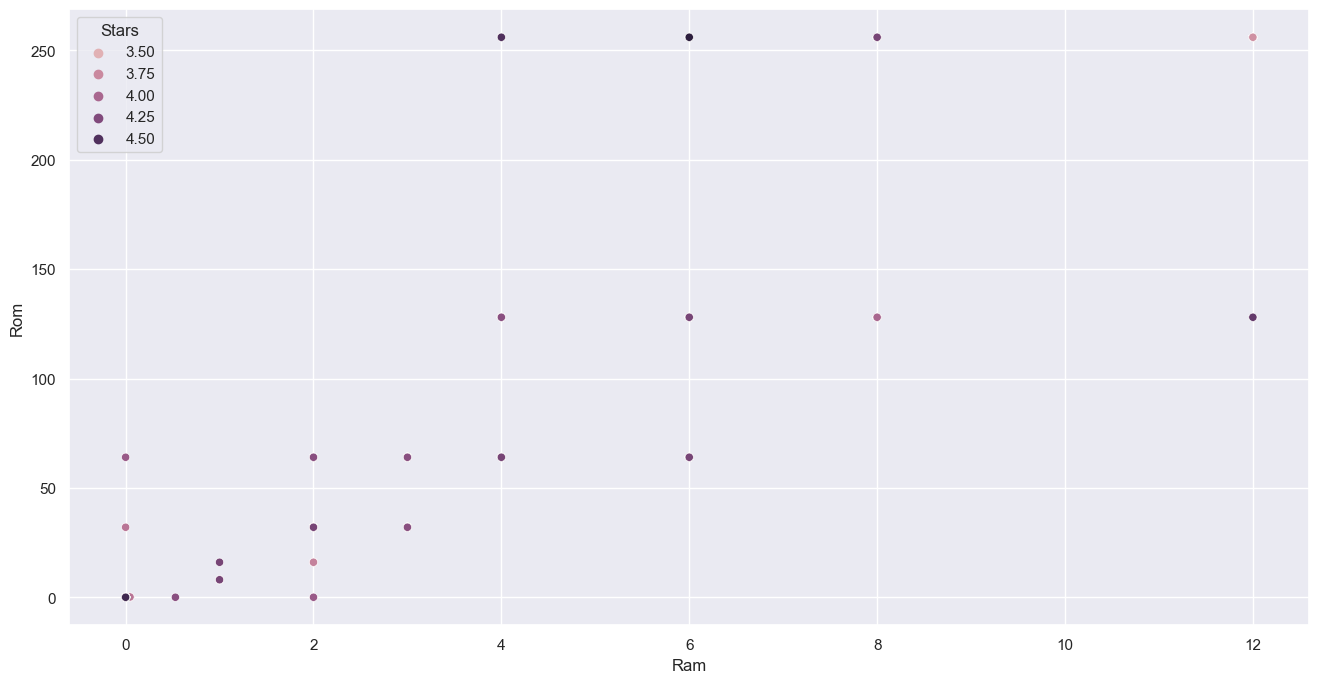

In [95]:


f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'Ram', y = 'Rom', hue = 'Stars', data = Cleaned)
plt.show()

-Generally as rom increase, ram increase. however there doesnt seem to have a relation between stars

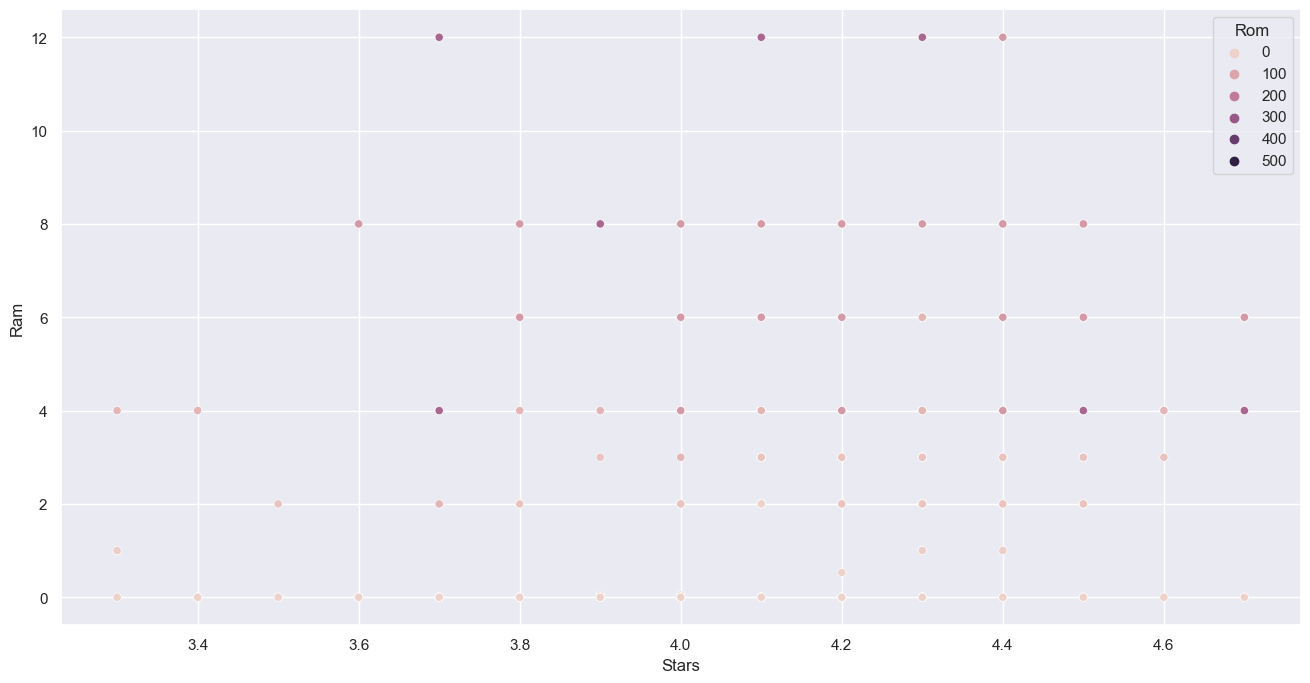

In [96]:
#switching the plots
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'Stars', y = 'Ram', hue = 'Rom', data = Cleaned)
plt.show()

Still no obvious relation of the stars and ram/rom

### ScreenSize&Battery Vs Stars

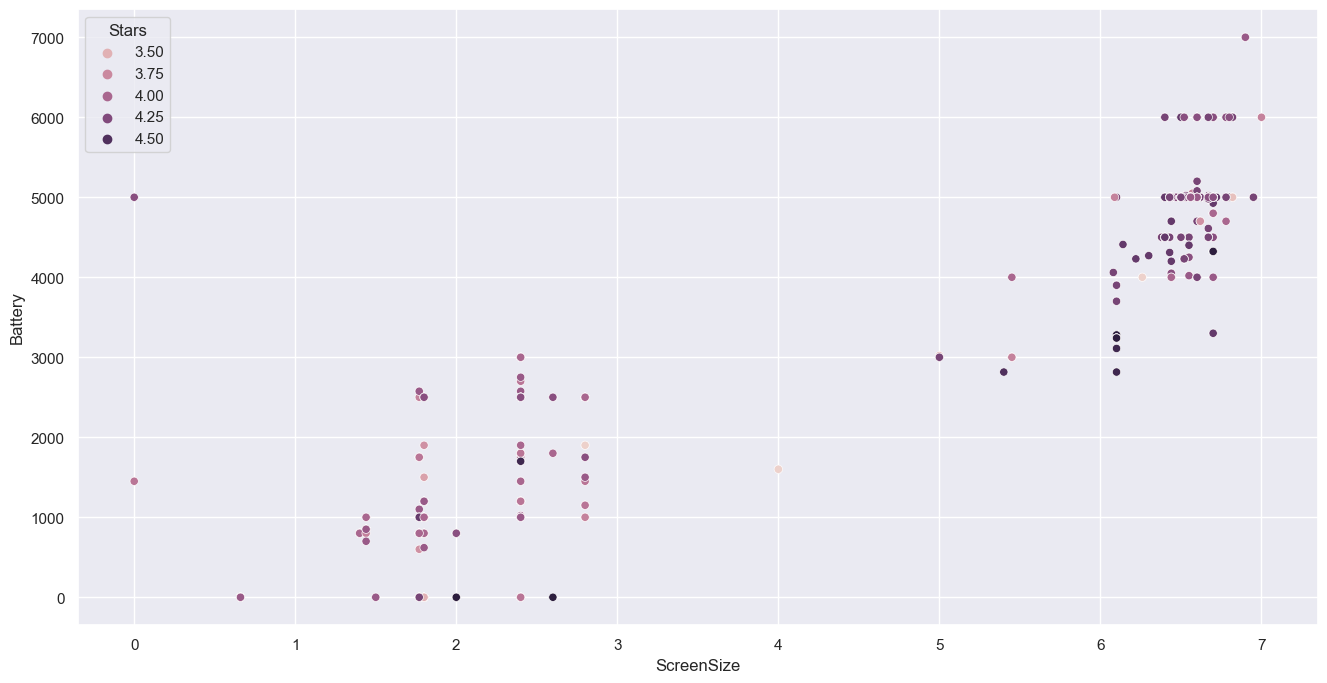

In [97]:
#switching the plots
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'ScreenSize', y = 'Battery', hue = 'Stars', data = Cleaned)
plt.show()

- generally as battery and screenSize increases, The shade of the stars also darken depicting higher stars <br>
- they are good predictors for stars

### Price&Rom Vs Stars

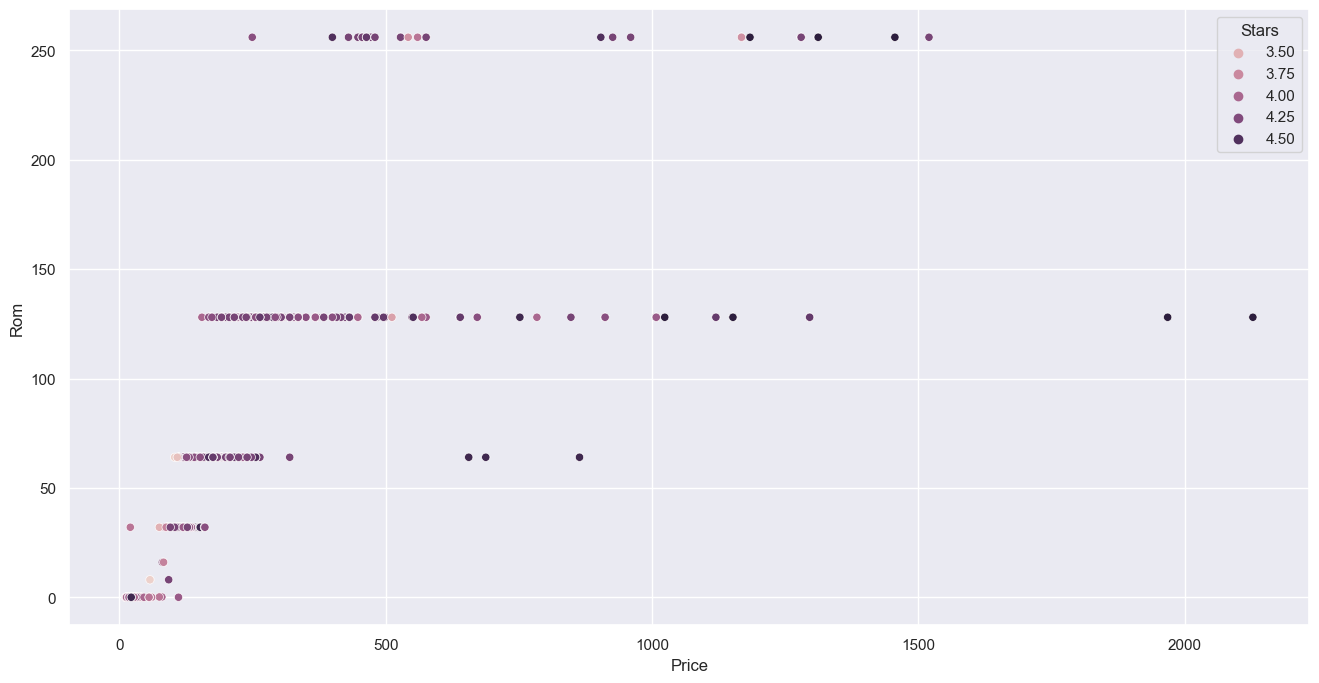

In [98]:
#switching the plots
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x = 'Price', y = 'Rom', hue = 'Stars', data = Cleaned)
plt.show()

- generally the higher priced for each rom size  have higher stars
- they might be good predictors for stars

.

.

# Model Selection & attempts
# ****REMEMBER TO DUPLICATE THE CLEANED DATAFRAME FOR UR MODEL. DO NOT USE CLEANED

### do ur model n analysis

attempt 1: split into 80/20 & fit in model. isit good? why? MSE? how accurate? <br>
attempt 2: cleaning to improve the accuracy. what you do? did it improve? improve by how much? (Note: even if it didnt improve its okay, keep the attempt and just say y u think didnt) <br>
attempt 3: continue to improve the accuracy. what you do? did it improve? improve by how much? (Note: even if it didnt improve its okay, keep the attempt and just say y u think didnt)<br>

- thing u can try to improve: <br>
1. fit in more predictors <br>
2. increase the depth of ur forest <br>
3. remove outliers <br>
4. replace NA or Remove NA <br>

# Section 4: Model 3 Random Forest 
Done by Vignesh

## Model 3: Using Random Forest as a model to predict stars using price and battery as predictors

Definition of Random Forest: Random forest is a learning algorithm that combines the results of multiple decision trees to make predictions. It can be used for both classification and regression tasks.

### Model 3 (Attempt 1): Using Random Forest Model to predict stars rating using price and battery as predictors

Chose 2 predictors:

1) Price
2) Battery

Price was chosen due to a relatively strong relationship with stars where the higher the price, the more likely the star rating would be as shown clearly by the scatter plot previously.

Even though battery capacity has a weak relationship with stars - objectively speaking, it is still relatively better compared to other variables where the higher the battery capacity of the smartphone, the more likely the star rating will be but there are quite a number of cases where there are phones with lower battery capacity being rated higher as shown in the scatter plot.

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Taking duplicate of Cleaned dataframe
Cleaned_rfr = Cleaned.copy()

# Remove the rows with missing values
Cleaned_rfr.dropna(subset=['Stars'], inplace=True)

# Select the features (predictors are known as features when using the random forest model) and target variable
X = Cleaned_rfr[['Price', 'Battery']]
y = Cleaned_rfr['Stars']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest regression model to the training data
reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict the Stars values for the test data
y_pred_train = reg.predict(X_train)

# Train: Evaluate the model's performance using mean squared error and R-squared
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Mean Squared Error (Train Data): {:.2f}".format(mse_train))
print("R-squared (Train Data): {:.2f}".format(r2_train))

# Predict the Stars values for the test data
y_pred_test = reg.predict(X_test)

# Test: Evaluate the model's performance using mean squared error and R-squared
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (Test Data): {}".format(mse_test))
print("R-squared (Test Data): {}".format(r2_test))

Mean Squared Error (Train Data): 0.01
R-squared (Train Data): 0.81
Mean Squared Error (Test Data): 0.033903885993743936
R-squared (Test Data): 0.3936053084148301


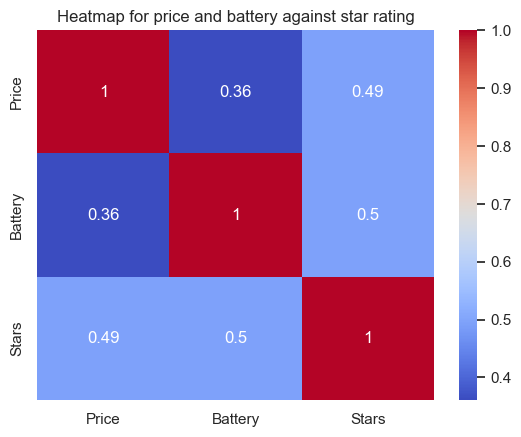

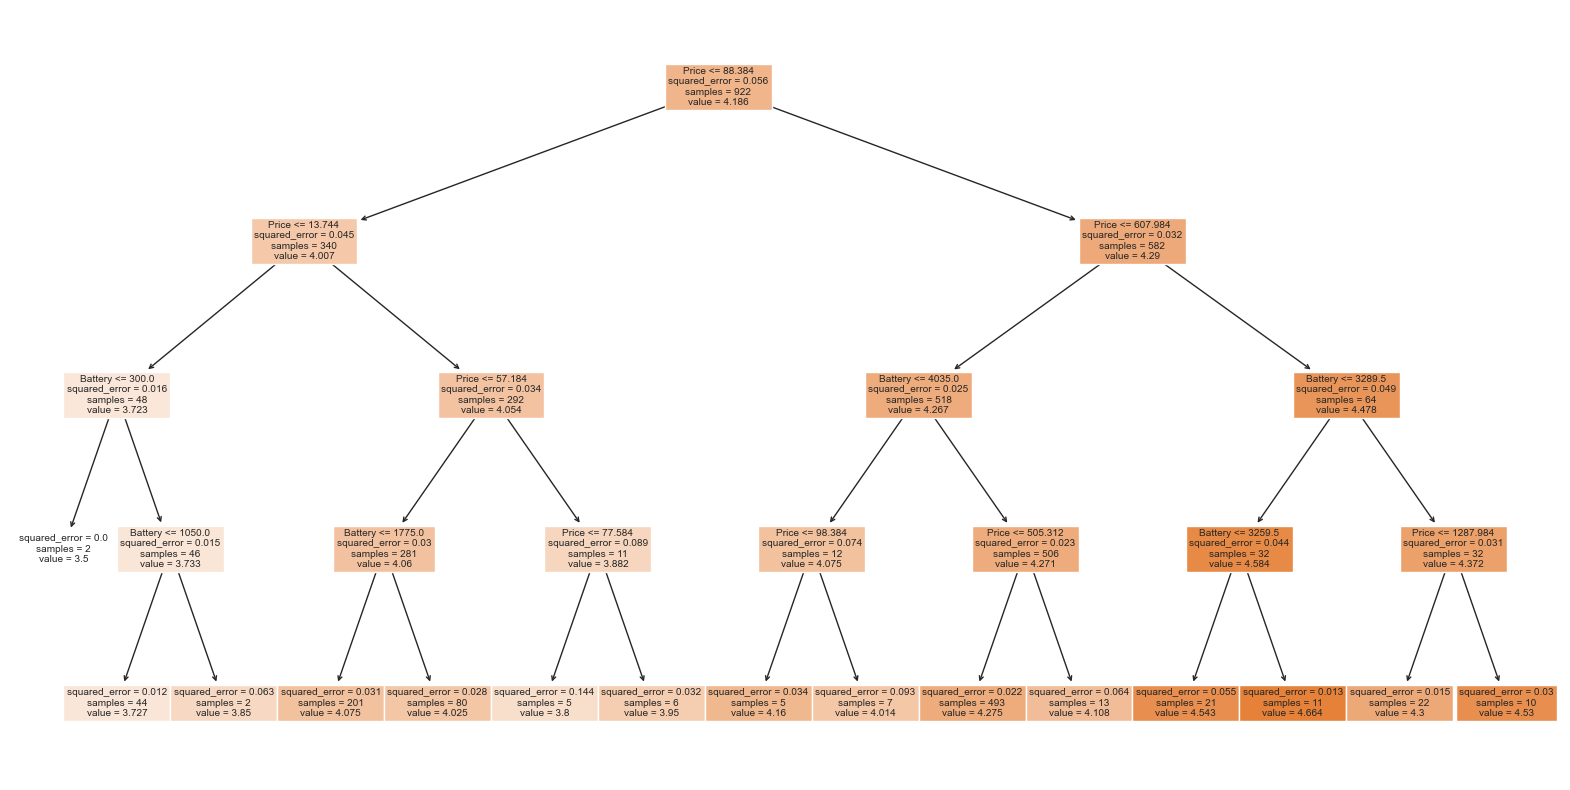

In [100]:
#Plotting both heat map and decision tree for attempt 1

#Heatmap
# Plot the heatmap
sb.heatmap(pd.concat([X, y], axis=1).corr(), cmap='coolwarm', annot=True)

# Add a title
plt.title('Heatmap for price and battery against star rating')

#Show the plot
plt.show()

#Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Fit a decision tree regression model to the data
reg = DecisionTreeRegressor(max_depth = 4).fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(reg, filled=True, feature_names=X.columns)
plt.show()

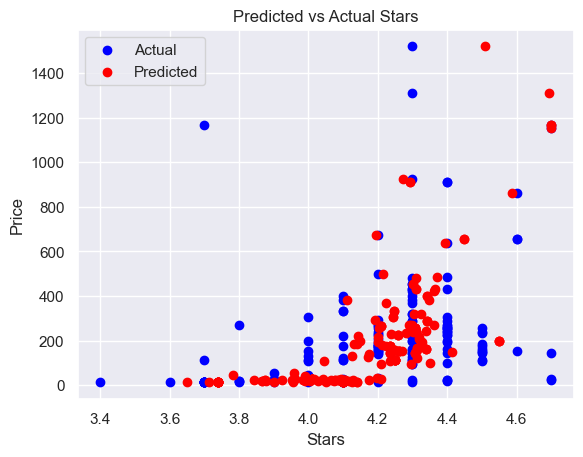

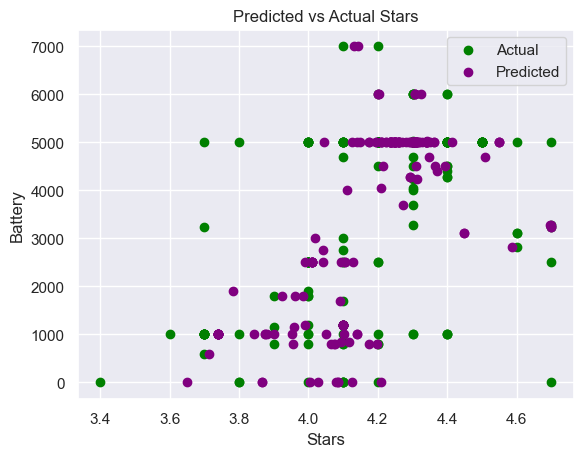

In [101]:
#Price
# Plot the actual data against stars
plt.scatter(y_test, X_test['Price'], color='blue', label='Actual')

# Plot the predicted data against stars
plt.scatter(y_pred_test, X_test['Price'], color='red', label='Predicted')

# Add a title and axis labels
plt.title('Predicted vs Actual Stars')
plt.xlabel('Stars')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Display the plot
plt.show()

#Battery
# Plot the actual data against stars
plt.scatter(y_test, X_test['Battery'], color='green', label='Actual')

# Plot the predicted data against stars
plt.scatter(y_pred_test, X_test['Battery'], color='purple', label='Predicted')

# Add a title and axis labels
plt.title('Predicted vs Actual Stars')
plt.xlabel('Stars')
plt.ylabel('Battery')

# Add a legend
plt.legend()

# Display the plot
plt.show()

#Analysis for attempt 1

- The heatmap suggests that both predictors are equally important in predicting the target variable. In other words, both predictors contribute relatively equally to the prediction of the target variable, and removing either one of them could have a negative impact on the the random forest model. 
- Thus, we went on to improve the model's performance to improve the MSE values by replacing NA values with median values

### Model 3 (Attempt 2): Random Forest Model by replacing NA values with median values

In [102]:
#Take a fresh copy again to replace NA values with median
Cleaned_for_price = Cleaned.copy()

#Find median value of the price dataframe column
median_value_price = Cleaned_rfr['Price'].median()
median_value_battery = Cleaned_rfr['Battery'].median()
median_value_stars = Cleaned_rfr['Stars'].median()

print("Median value for price: {:.2f}".format(median_value_price))
print("Median value for battery: {:.2f}".format(median_value_battery))
print("Median value for Stars: {:.2f}".format(median_value_stars))

# Remove the rows with missing values
Cleaned_rfr['Price'] = Cleaned_rfr['Price'].fillna(median_value_price)
Cleaned_rfr['Battery'] = Cleaned_rfr['Battery'].fillna(median_value_battery)
Cleaned_rfr['Stars'] = Cleaned_rfr['Stars'].fillna(median_value_stars)

# Select the features (predictors are known as features when using the random forest model) and target variable
X = Cleaned_rfr[['Price', 'Battery']]
y = Cleaned_rfr['Stars']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest regression model to the training data
reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict the Stars values for the test data
y_pred_train = reg.predict(X_train)

# Train: Evaluate the model's performance using mean squared error and R-squared
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Mean Squared Error (Train Data): {:.2f}".format(mse_train))
print("R-squared (Train Data): {:.2f}".format(r2_train))

# Predict the Stars values for the test data
y_pred_test = reg.predict(X_test)

# Test: Evaluate the model's performance using mean squared error and R-squared
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (Test Data): {}".format(mse_test))
print("R-squared (Test Data): {}".format(r2_test))

Median value for price: 151.98
Median value for battery: 4750.00
Median value for Stars: 4.20
Mean Squared Error (Train Data): 0.01
R-squared (Train Data): 0.81
Mean Squared Error (Test Data): 0.033903885993743936
R-squared (Test Data): 0.3936053084148301


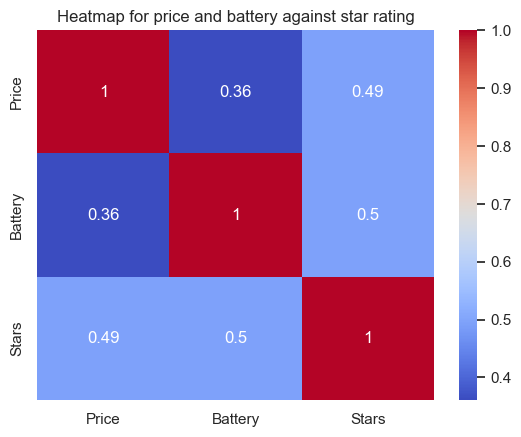

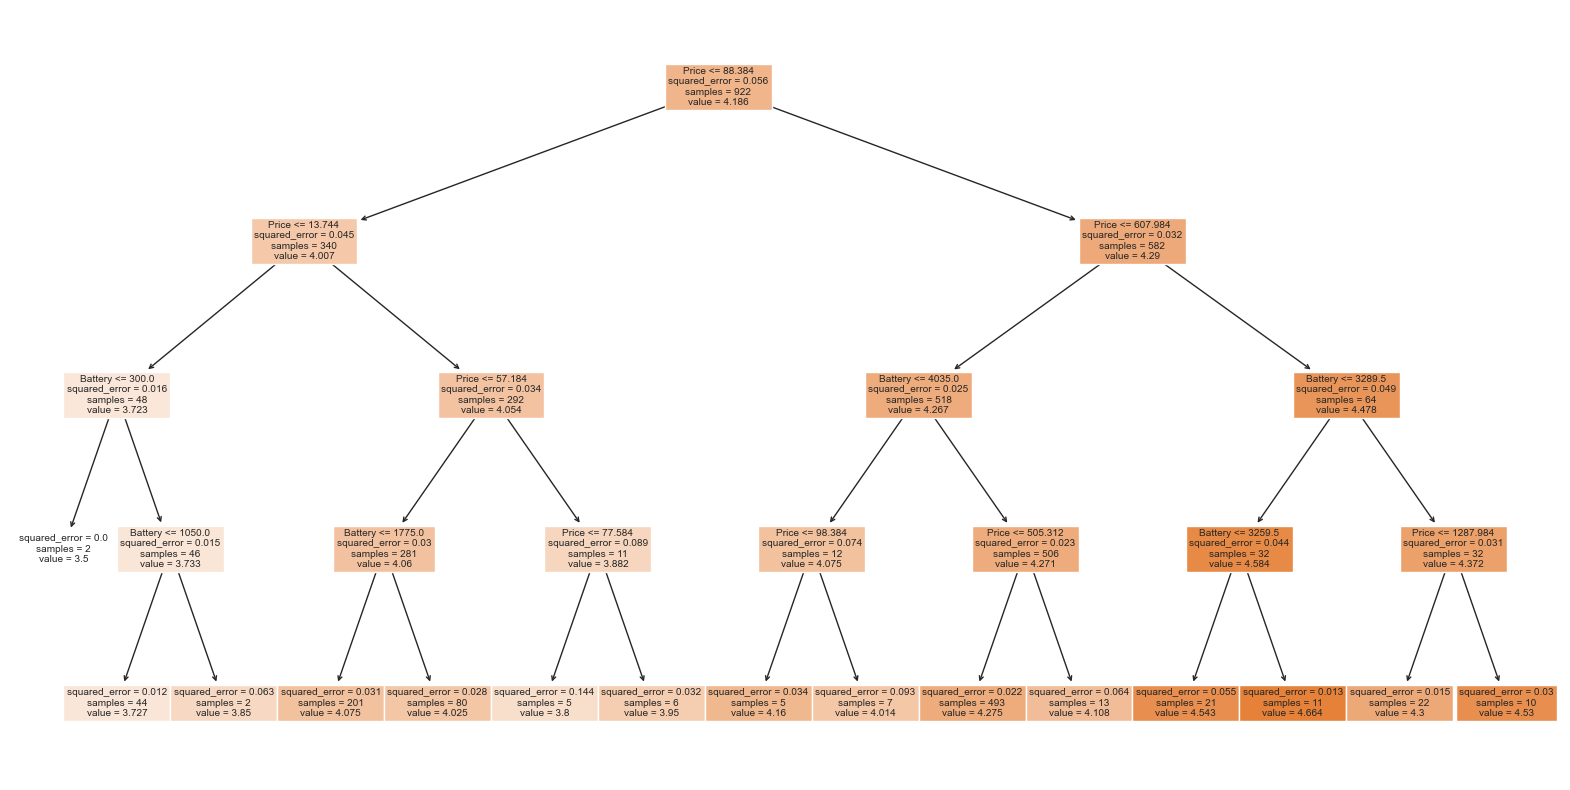

In [103]:
#Plotting both heat map and decision tree for attempt 1

#Heatmap
# Plot the heatmap
sb.heatmap(pd.concat([X, y], axis=1).corr(), cmap='coolwarm', annot=True)

# Add a title
plt.title('Heatmap for price and battery against star rating')

#Show the plot
plt.show()

#Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Fit a decision tree regression model to the data
reg = DecisionTreeRegressor(max_depth = 4).fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(reg, filled=True, feature_names=X.columns)
plt.show()

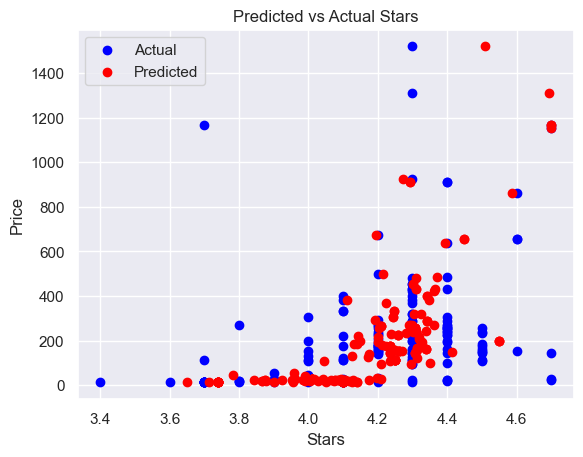

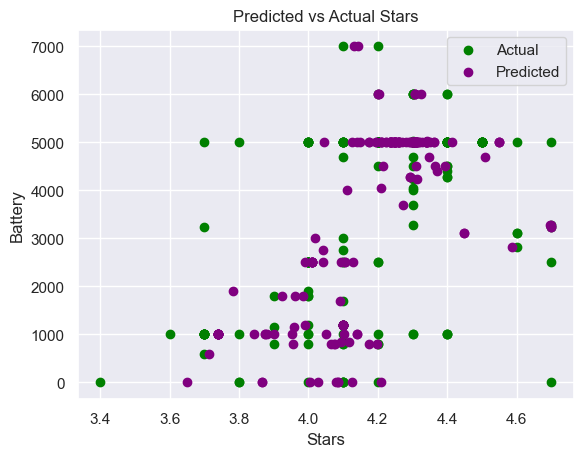

In [104]:
#Price
# Plot the actual data against stars
plt.scatter(y_test, X_test['Price'], color='blue', label='Actual')

# Plot the predicted data against stars
plt.scatter(y_pred_test, X_test['Price'], color='red', label='Predicted')

# Add a title and axis labels
plt.title('Predicted vs Actual Stars')
plt.xlabel('Stars')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Display the plot
plt.show()

#Battery
# Plot the actual data against stars
plt.scatter(y_test, X_test['Battery'], color='green', label='Actual')

# Plot the predicted data against stars
plt.scatter(y_pred_test, X_test['Battery'], color='purple', label='Predicted')

# Add a title and axis labels
plt.title('Predicted vs Actual Stars')
plt.xlabel('Stars')
plt.ylabel('Battery')

# Add a legend
plt.legend()

# Display the plot
plt.show()

Analysis for attempt 2:

- Replacing NA values did not impact the performance of the random forest model in any way.
- Both the MSE and R^2 values did not improve at all.
- But we still did not stop there. To improve the performance of the random forest, we went onto removing the outliers to see if it truly improved the perfromance of the random forest model.

### Model 3 (Attempt 3): Random Forest Model by removing outliers

In [105]:
#Remove outliers for Price
Q1 = Cleaned_rfr['Price'].quantile(0.25)
Q3 = Cleaned_rfr['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

Cleaned_rfr = Cleaned_rfr[(Cleaned_rfr['Price'] > lower_range) & (Cleaned_rfr['Price'] < upper_range)]

#Remove outliers for Battery
Q1 = Cleaned_rfr['Battery'].quantile(0.25)
Q3 = Cleaned_rfr['Battery'].quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

Cleaned_rfr = Cleaned_rfr[(Cleaned_rfr['Battery'] > lower_range) & (Cleaned_rfr['Battery'] < upper_range)]

#Remove outliers for Stars
Q1_stars = Cleaned_rfr['Stars'].quantile(0.25)
Q3_stars = Cleaned_rfr['Stars'].quantile(0.75)
IQR_stars = Q3_stars - Q1_stars
lower_range_stars = Q1_stars - 1.5 * IQR_stars
upper_range_stars = Q3_stars + 1.5 * IQR_stars

Cleaned_for_price = Cleaned_for_price[(Cleaned_for_price['Stars'] > lower_range) & (Cleaned_for_price['Stars'] < upper_range)]

# Select the features (predictors are known as features when using the random forest model) and target variable
X = Cleaned_rfr[['Price', 'Battery']]
y = Cleaned_rfr['Stars']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest regression model to the training data
reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict the Stars values for the test data
y_pred_train = reg.predict(X_train)

# Train: Evaluate the model's performance using mean squared error and R-squared
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Mean Squared Error (Train Data): {:.2f}".format(mse_train))
print("R-squared (Train Data): {:.2f}".format(r2_train))

# Predict the Stars values for the test data
y_pred_test = reg.predict(X_test)

# Test: Evaluate the model's performance using mean squared error and R-squared
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (Test Data): {}".format(mse_test))
print("R-squared (Test Data): {}".format(r2_test))

Mean Squared Error (Train Data): 0.01
R-squared (Train Data): 0.78
Mean Squared Error (Test Data): 0.03288372888366167
R-squared (Test Data): 0.38265798856847977


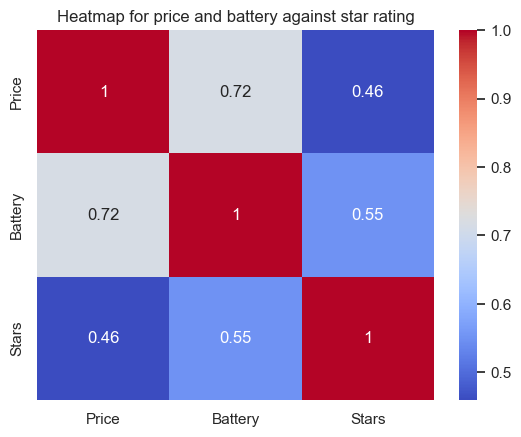

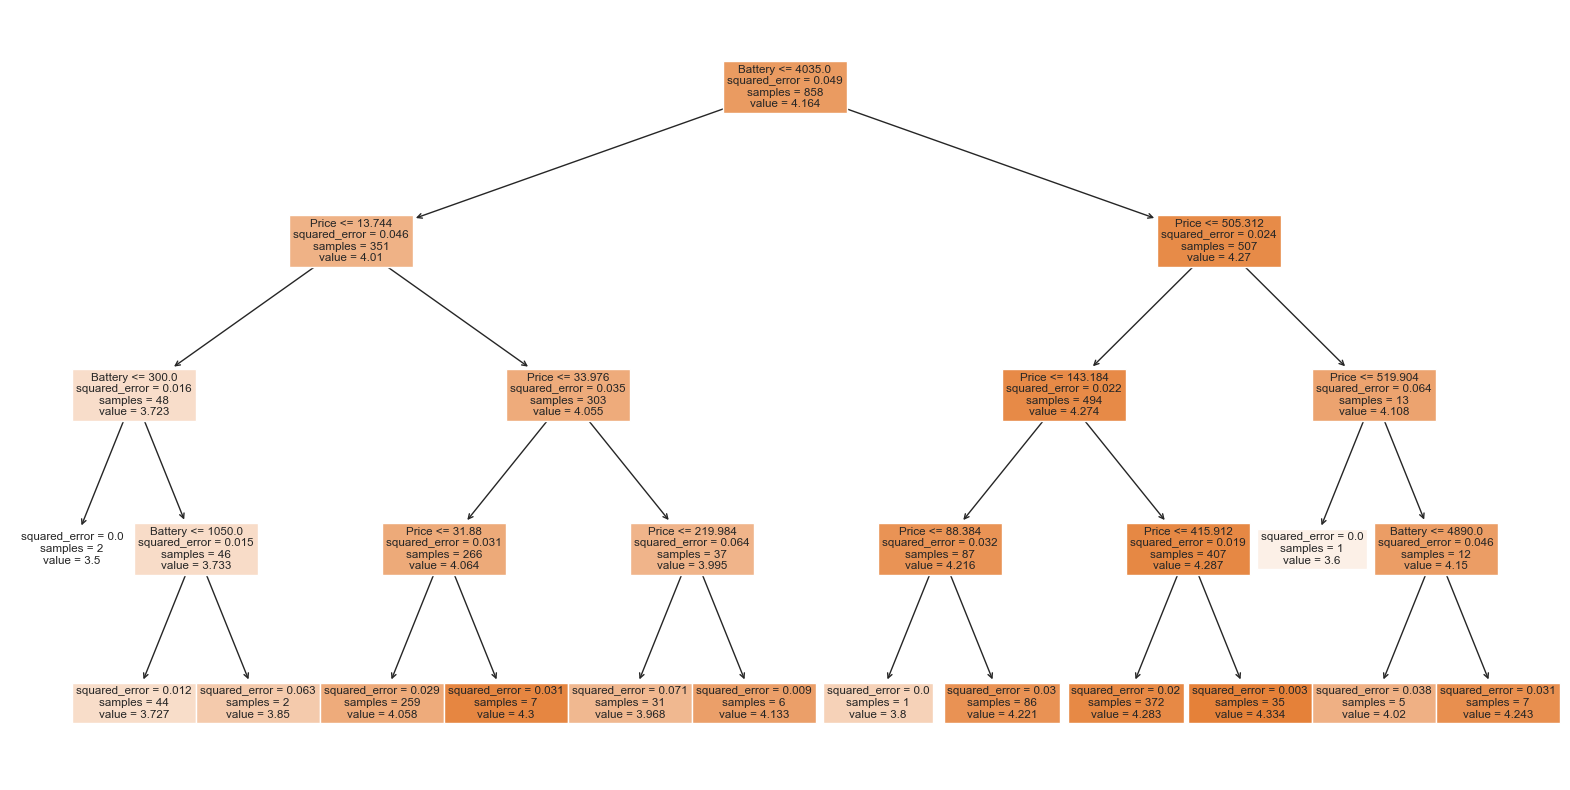

In [106]:
#Plotting both heat map and decision tree for attempt 1

#Heatmap
# Plot the heatmap
sb.heatmap(pd.concat([X, y], axis=1).corr(), cmap='coolwarm', annot=True)

# Add a title
plt.title('Heatmap for price and battery against star rating')

#Show the plot
plt.show()

#Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Fit a decision tree regression model to the data
reg = DecisionTreeRegressor(max_depth = 4).fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(reg, filled=True, feature_names=X.columns)
plt.show()

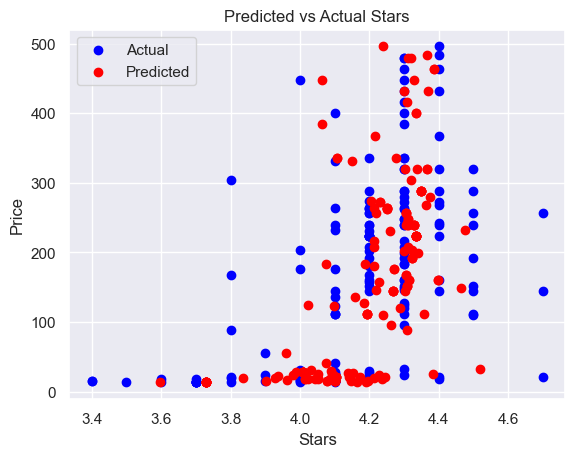

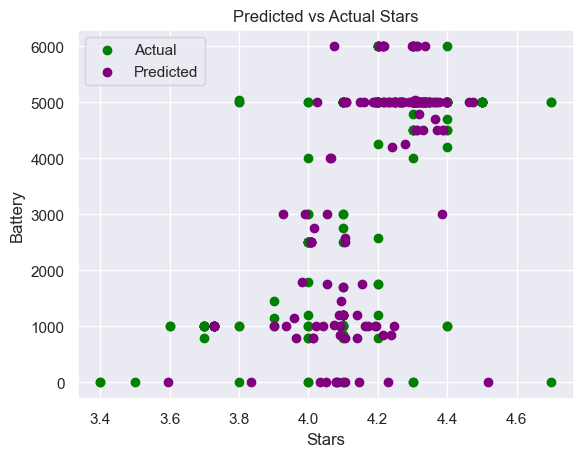

In [107]:
#Price
# Plot the actual data against stars
plt.scatter(y_test, X_test['Price'], color='blue', label='Actual')

# Plot the predicted data against stars
plt.scatter(y_pred_test, X_test['Price'], color='red', label='Predicted')

# Add a title and axis labels
plt.title('Predicted vs Actual Stars')
plt.xlabel('Stars')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Display the plot
plt.show()

#Battery
# Plot the actual data against stars
plt.scatter(y_test, X_test['Battery'], color='green', label='Actual')

# Plot the predicted data against stars
plt.scatter(y_pred_test, X_test['Battery'], color='purple', label='Predicted')

# Add a title and axis labels
plt.title('Predicted vs Actual Stars')
plt.xlabel('Stars')
plt.ylabel('Battery')

# Add a legend
plt.legend()

# Display the plot
plt.show()

#Analysis for attempt 3.

- As shown by the heatmap, we can see that accuarcy in predicting star rating by battery increased quite significantly to 0.55 but at the same the accuracy in predicting star rating by price fell quite a bit

- Furthemore, removing outliers did improve the MSE value by 0.01 which shows that it did improve the performance of the random forest model.

# Conclusion

Replacing NA values with the median value of the respective columns has zero effect on the MSE value. Furthermore, removing outliers of the respective columns actually improved the MSE value and did improve the accuracy of the Random Forest model slightly. The best MSE value obtained using the random forest model happened to be 0.32 among the 3 attempts.